In [203]:
# Importing all necessary libraries to proceed with this project.

import warnings
import itertools
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import calendar
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import random
import sqlite3
from itertools import cycle, islice
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
# Import timedelta from datetime library
from datetime import timedelta




ss = StandardScaler()

# importing the Time Series algorithm for forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

# import metrics
from sklearn.metrics import mean_squared_error

In [237]:
data=df_weekly = pd.read_csv('walmart.csv')

In [239]:
data.shape

(6435, 8)

In [238]:
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# converting it to date time format

data["Date"]=pd.to_datetime(data.Date)


In [8]:
# Extracting details from date given. so that can be used for seasonal checks or grouping

data["Day"]=data.Date.dt.day
data["Month"]=data.Date.dt.month
data["Year"]=data.Date.dt.year
data['Week'] = data.Date.dt.isocalendar().week 

# Changing the Months value from numbers to real values like Jan, Feb to Dec

data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

In [9]:
#Checking null values

data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
Week            0
dtype: int64

In [10]:
data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment          Day         Year       Week  
count  6435.000000   6435.000000  6435.000000  6435.000000     6435.0  
mean    171.578394      7.999151    15.650350  2010.965035       26.0  
std      39.356712      1.875885     8.753908     0.797019  14.511794  
min     126.064000      3.879000     1.000000  2010.000000        1.0  
25%     131.735000      6.891000     8.000000  2010.000000       14.0  
50%     182.616521      7.874000    16.000000  2011.000000       26.0  
75%     212.743293      8.622000    23.000000  2012.000000       38.0  
max     227.232807     14.313000    31.000000  2012.000000       52.0

In [240]:
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [12]:
data[ 'Date']

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

**Analysis**

1) Which store has maximum sales?

<AxesSubplot:title={'center':'Total sales for each store'}, xlabel='Store', ylabel='Weekly_Sales'>

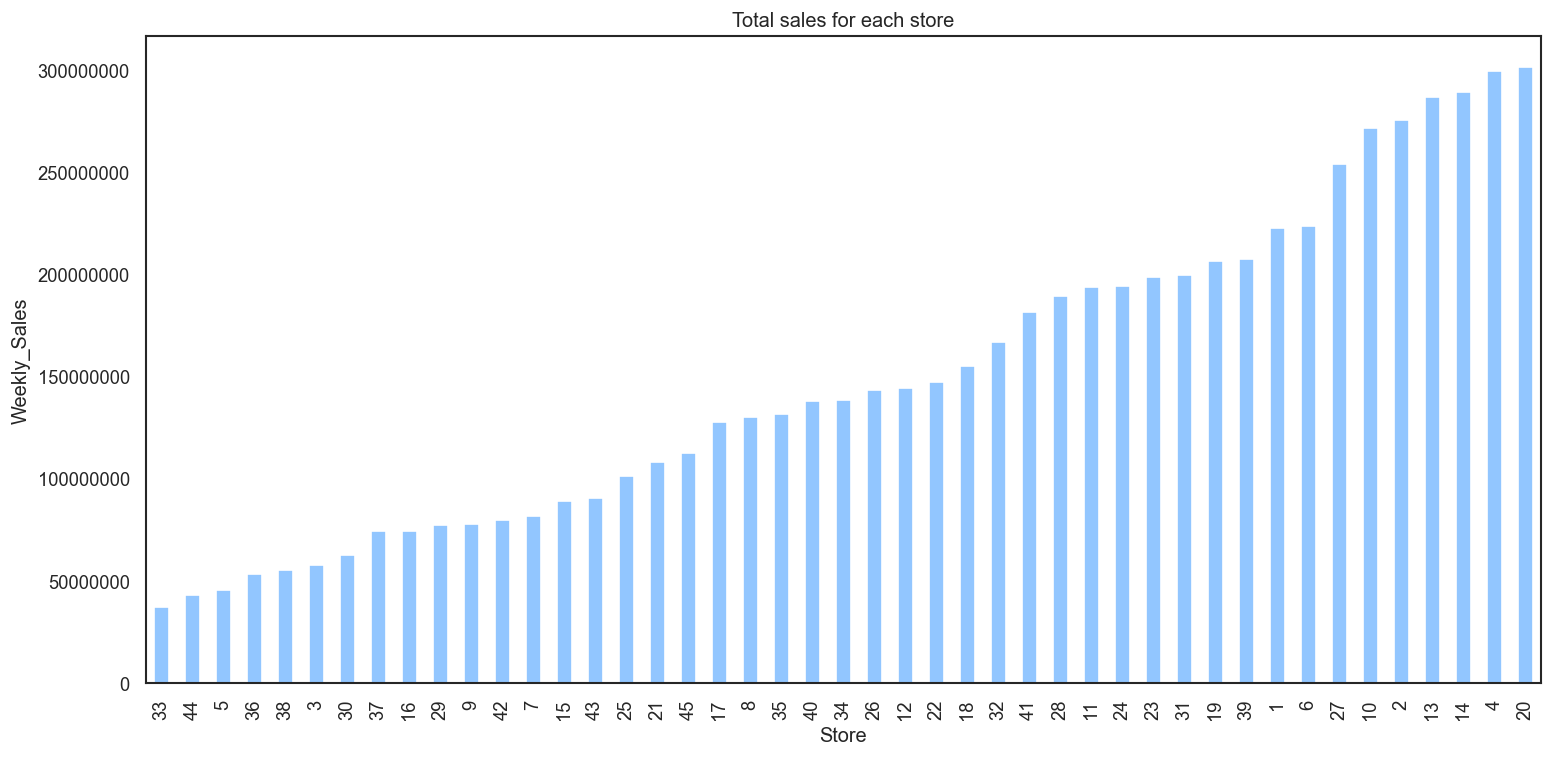

In [241]:
total_sales= data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_array = np.array(total_sales)

plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
total_sales.plot(kind='bar')

Clearly, from the above graph, it is visible that the store which has maximum sales is store number 20 and the store which has minimum sales is the store number 33.


**Maximum Standard Deviation:**
- Standard deviation is like a measure of how spread out the numbers are. If it's high, it means the numbers (sales in this case) are all over the place.
- So, when we say "which store has the maximum standard deviation," we're asking which store has the most unpredictable or varying sales from week to week.

**Coefficient of Mean to Standard Deviation:**
- We talked about this before. It's a way of saying, "Compared to what we usually expect in a regular week (the mean), how much do our sales usually jump around?"
- If this coefficient is high, it means the sales are often very different from what the store would predict for a typical week.

**Putting it Together:**
- The store with the maximum standard deviation has sales that vary a lot – they might be high one week and low the next, making it less predictable.
- When we check the coefficient of mean to standard deviation for that store, we're confirming that its sales are indeed quite different from what's expected on a regular week.

In simpler terms, it's like saying, "Which store has the craziest, up-and-down sales, and just how different are those sales from what they'd expect on an average week?"

2) Which store has maximum standard deviation? i.e. the sales vary a lot. Also, find out the coefficient of mean to standard deviation.

In [16]:
# Calculate the standard deviation of weekly sales for each store and sort in descending order
data_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))

# Find the store with the maximum standard deviation
store_with_max_std = data_std.head(1).index[0]

# Find the standard deviation value for the store with the maximum standard deviation
max_std_value = data_std.head(1).Weekly_Sales[store_with_max_std]

# Calculate the mean of weekly sales for the store with the maximum standard deviation
mean_sales_for_max_std_store = data.groupby('Store')['Weekly_Sales'].mean().loc[store_with_max_std]

# Calculate the coefficient of variation (mean to standard deviation ratio)
coefficient_of_variation = mean_sales_for_max_std_store / max_std_value

store_with_max_std, max_std_value, coefficient_of_variation


(14, 317569.9494755081, 6.363884253900051)

Store number 14 has maximum standard deviation

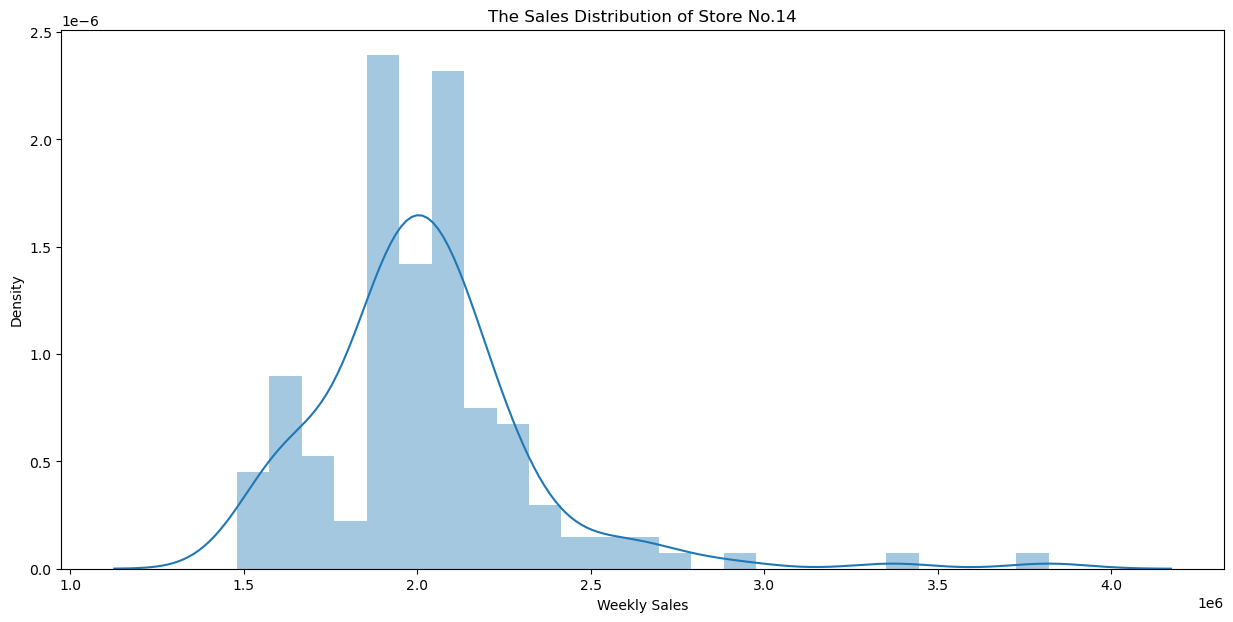

In [17]:
# Extracting the sales data for store number 14 and plotting its distribution

plt.figure(figsize=(15, 7))
store_with_max_std = data_std.head(1).index[0]
sales_data = data[data['Store'] == store_with_max_std]['Weekly_Sales']

sns.distplot(sales_data)
plt.title('The Sales Distribution of Store No.' + str(store_with_max_std))
plt.xlabel('Weekly Sales')
plt.ylabel('Density')
plt.show()


 **"coefficient of mean to standard deviation"
 

1. **Mean**: It's a measure of the average value. For example, if you sum up all the weekly sales for a store and then divide by the number of weeks, you get the mean.

2. **Standard Deviation**: It measures how spread out the values are. If the standard deviation is high, it means the values are more spread out from the average.

3. **Coefficient of Mean to Standard Deviation**: This ratio tells us how much the values vary (standard deviation) compared to the average (mean). A higher coefficient means more variation relative to the average.

Now, if store number 35 has the maximum coefficient of mean to standard deviation, it suggests that the sales for this store vary a lot compared to the average. In simpler terms, the store experiences significant ups and downs in weekly sales, making it less predictable or stable compared to other stores.

Store 35 might want to look into the factors causing such variation and consider strategies to make its sales more consistent or understand and manage the fluctuations better.

In [18]:
#Calculating the coefficient of mean to standard deviation

coef = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std() / data.groupby('Store')['Weekly_Sales'].mean())

coef = coef.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})

coef_max = coef.sort_values(by='Coefficient of mean to standard deviation',ascending=False)

coef_max.head(7)

Coefficient of mean to standard deviation
Store                                           
35                                      0.229681
7                                       0.197305
15                                      0.193384
29                                      0.183742
23                                      0.179721
21                                      0.170292
45                                      0.165613

Thus, the store which has maximum coefficient of mean to standard deviation is store number 35.

Now, if store number 35 has the maximum coefficient of mean to standard deviation, it suggests that the sales for this store vary a lot compared to the average. In simpler terms, the store experiences significant ups and downs in weekly sales, making it less predictable or stable compared to other stores.

Store 35 might want to look into the factors causing such variation and consider strategies to make its sales more consistent or understand and manage the fluctuations better.

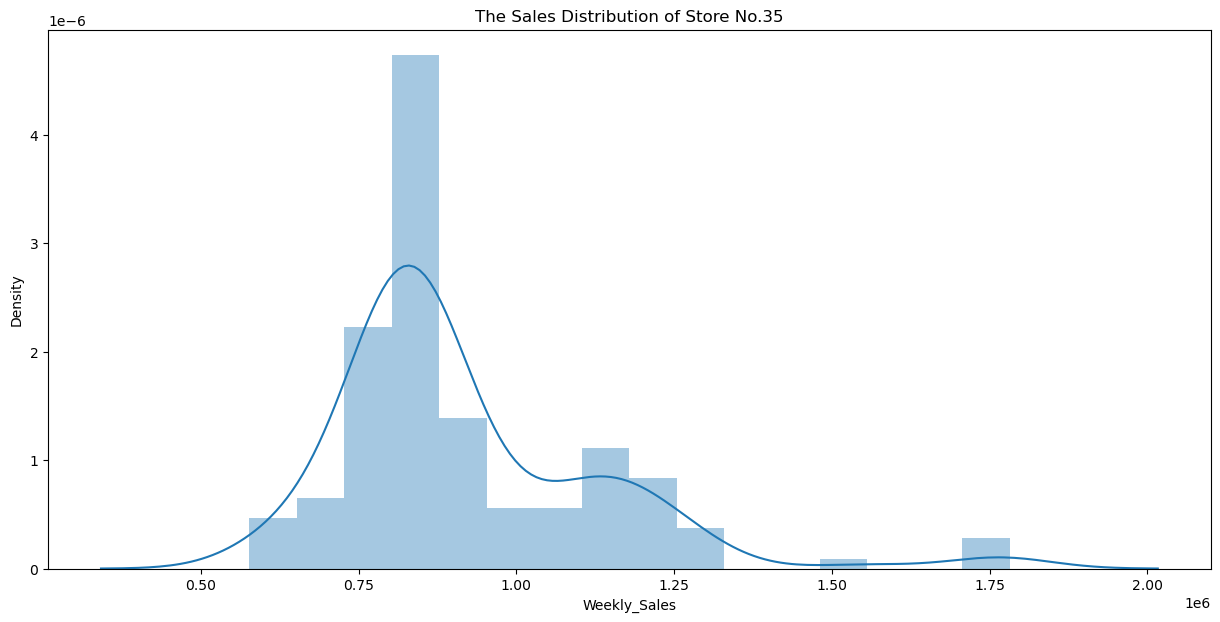

In [19]:
# Distribution of store 35 has maximum coefficient of mean to standard deviation

plt.figure(figsize=(15,7))

sns.distplot(data[data['Store'] == coef_max.head(1).index[0]]['Weekly_Sales'])

plt.title('The Sales Distribution of Store No.'+str(coef_max.head(1).index[0]))

import warnings
warnings.filterwarnings('ignore')

Difference between Store 14 (maximum standard deviation) and Store 35 (maximum coefficient of mean to standard deviation):

**Store 14 (Maximum Standard Deviation):**
- This store has the most varying sales from week to week, meaning the numbers can be all over the place.
- It might experience weeks with very high sales followed by weeks with very low sales, creating a less predictable pattern.

**Store 35 (Maximum Coefficient of Mean to Standard Deviation):**
- This store not only has varying sales but also those variations are quite different from what's expected in a regular week (the mean).
- It's not just that the sales vary; it's that the variations are significant compared to the average. So, it's less predictable, and the sales can deviate a lot from the expected average.

**In Summary:**
- Store 14 has high variability in sales, but we don't know how much that variability differs from the average.
- Store 35 not only has varying sales but those variations are noticeably different from what they'd typically expect in a regular week.

In simple terms, Store 14 is unpredictable in terms of sales, and Store 35 is not only unpredictable but the variations are significantly different from what they would consider a "normal" week.

The impact and potential solutions would depend on the specific business goals and context, but some insights can be consideredas below:

**Impact:**
1. **Store 14 (High Standard Deviation):**
   - *Challenge:* The unpredictable sales pattern can make it challenging for inventory management and workforce scheduling.
   - *Impact:* The store might face overstock or stockouts, leading to potential revenue loss or increased operational costs.

2. **Store 35 (High Coefficient of Mean to Standard Deviation):**
   - *Challenge:* The significant variations from the expected average make forecasting and budgeting more difficult.
   - *Impact:* Planning becomes trickier, and the store might struggle with accurately predicting and meeting sales targets.

**Potential Solutions:**
1. **Store 14 (High Standard Deviation):**
   - *Inventory Optimization:* Implement advanced inventory management systems to dynamically adjust stock levels based on real-time sales data.
   - *Adaptive Scheduling:* Use flexible workforce scheduling that can quickly adapt to changing demand patterns.

2. **Store 35 (High Coefficient of Mean to Standard Deviation):**
   - *Advanced Forecasting:* Invest in advanced forecasting models that consider both the mean and standard deviation, providing a more nuanced prediction of sales patterns.
   - *Dynamic Budgeting:* Implement a budgeting strategy that accounts for the variability in sales, allowing for more adaptive financial planning.

add this in last of anlaysis**Additional Considerations:**
- **Data Analysis:** Continuously analyze data to identify patterns and trends. It's crucial to understand the root causes of variability.
- **Marketing Strategies:** Tailor marketing strategies to engage customers during peak and off-peak periods, potentially smoothing out sales fluctuations.
- **Customer Engagement:** Foster customer loyalty programs to encourage repeat business, even during unpredictable sales periods.

Remember, these are general suggestions, and the specific strategies would depend on a more detailed understanding of your business goals, customer behavior, and the market environment.

3) Which store/s has good quarterly growth rate in Q3’2012 ?

In [22]:
#Calculating Growth rate in Q3'2012
quarter_2_sales= data[(data['Date'] >= '2012-04-01') & (data['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
quarter_3_sales= data[(data['Date'] >= '2012-07-01') & (data['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()
quarterly_growth_rate = ((quarter_3_sales - quarter_2_sales )/quarter_2_sales)*100
quarterly_growth_rate.sort_values(ascending=False).head()

Store
16   -2.789294
7    -3.824738
35   -4.663086
26   -6.057624
39   -6.396875
Name: Weekly_Sales, dtype: float64

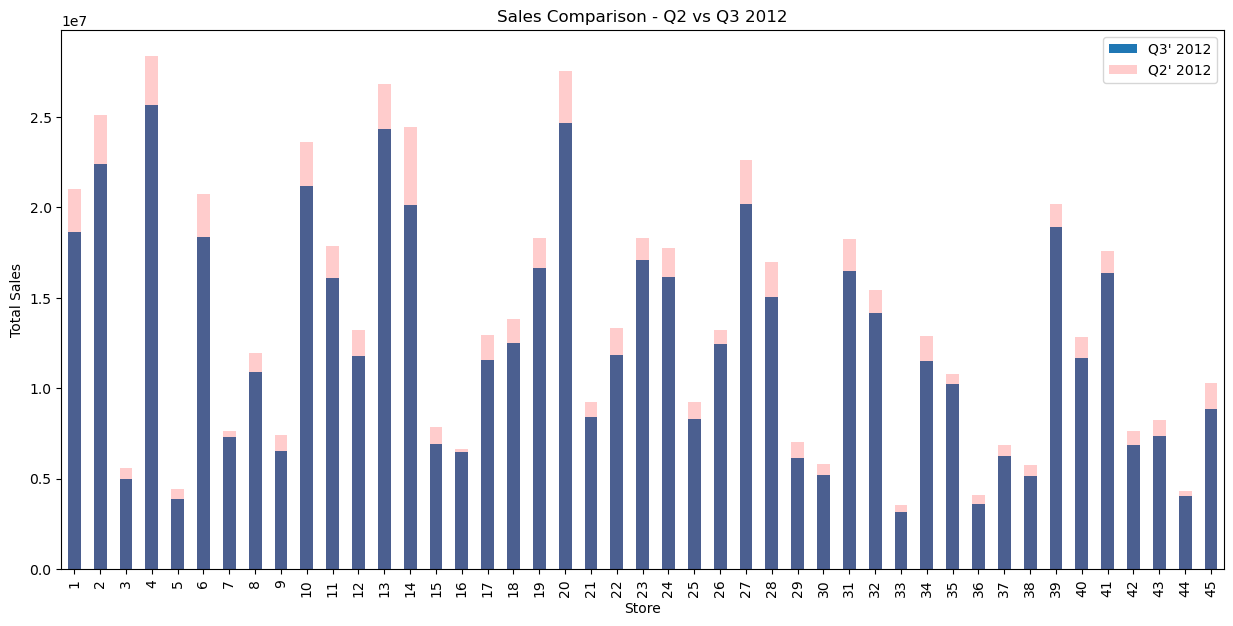

In [23]:
# Plotting the difference between sales for second and third quarterly

plt.figure(figsize=(15,7))

quarter_2_sales.plot(ax=quarter_3_sales.plot(kind ='bar'),kind='bar',color='Red',alpha=0.2,legend=True)
# Adding labels and title
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Sales Comparison - Q2 vs Q3 2012')
plt.legend(["Q3' 2012", "Q2' 2012"])

Clearly, from the above graph, it is evident that the store which has good quarterly sales in Q3’2012 is store no. 4.

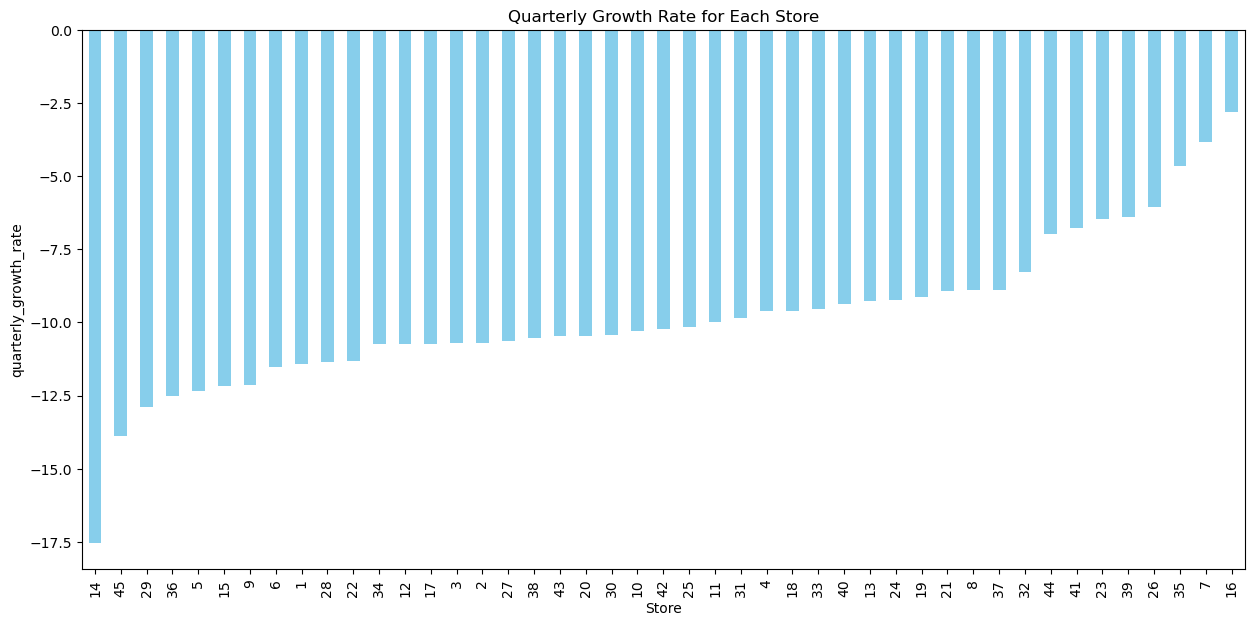

In [26]:
# Create a vertical bar plot with descending order
plt.figure(figsize=(15, 7))
quarterly_growth_rate.sort_values(ascending=True).plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Store')  # You may need to adjust this label based on your data
plt.ylabel('quarterly_growth_rate')
plt.title('Quarterly Growth Rate for Each Store')

# Show the plot
plt.show()

Here, there is no store which has performed better in the 3rd quarter as compared to the 2nd quarter.

Holiday Sales

4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

Holiday Events:

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

In [27]:
#Defining holiday dates
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [28]:
# Assuming you have the required dates for Super Bowl, Labour Day, Thanksgiving, and Christmas
Super_Bowl_Sales = data[data.Date.isin(Super_Bowl)]['Weekly_Sales'].mean()
Labour_Day_Sales = data[data.Date.isin(Labour_Day)]['Weekly_Sales'].mean()
Thanksgiving_Sales = data[data.Date.isin(Thanksgiving)]['Weekly_Sales'].mean()
Christmas_Sales = data[data.Date.isin(Christmas)]['Weekly_Sales'].mean()

Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales

(1079127.9877037038, 1042427.293925926, 1471273.427777778, 960833.1115555555)

In [29]:
#Calculating mean sales on non-holidays :
Non_Holiday_Sales = data[data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
Non_Holiday_Sales

1041256.3802088555

In [30]:
Mean_Sales = {'Super_Bowl_Sales' : Super_Bowl_Sales,
              'Labour_Day_Sales': Labour_Day_Sales,
              'Thanksgiving_Sales':Thanksgiving_Sales,
              'Christmas_Sales': Christmas_Sales,
              'Non_Holiday_Sales': Non_Holiday_Sales}
Mean_Sales 

{'Super_Bowl_Sales': 1079127.9877037038,
 'Labour_Day_Sales': 1042427.293925926,
 'Thanksgiving_Sales': 1471273.427777778,
 'Christmas_Sales': 960833.1115555555,
 'Non_Holiday_Sales': 1041256.3802088555}

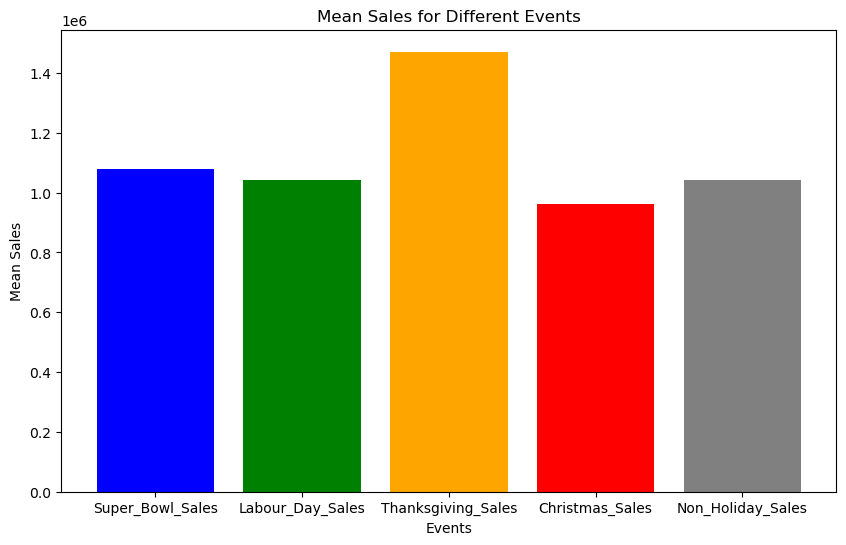

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(Mean_Sales.keys(), Mean_Sales.values(), color=['blue', 'green', 'orange', 'red', 'gray'])
plt.title('Mean Sales for Different Events')
plt.xlabel('Events')
plt.ylabel('Mean Sales')
plt.show()

Thanksgiving has higher sales than the mean sales on non-holidays.

**Year-wise Monthly Sales

In [32]:
import plotly.express as px


fig_2010 = px.scatter(data[data['Year'] == 2010], x="Month", y="Weekly_Sales", color="Week",
                      size="Weekly_Sales", hover_name="Weekly_Sales",
                      title="Year-wise Monthly Sales - 2010")

fig_2011 = px.scatter(data[data['Year'] == 2011], x="Month", y="Weekly_Sales", color="Week",
                      size="Weekly_Sales", hover_name="Weekly_Sales",
                      title="Year-wise Monthly Sales - 2011")

fig_2012 = px.scatter(data[data['Year'] == 2012], x="Month", y="Weekly_Sales", color="Week",
                      size="Weekly_Sales", hover_name="Weekly_Sales",
                      title="Year-wise Monthly Sales - 2012")

# Show the plots
fig_2010.show()
fig_2011.show()
fig_2012.show()


In [ ]:
Weekly sales per store (each year)

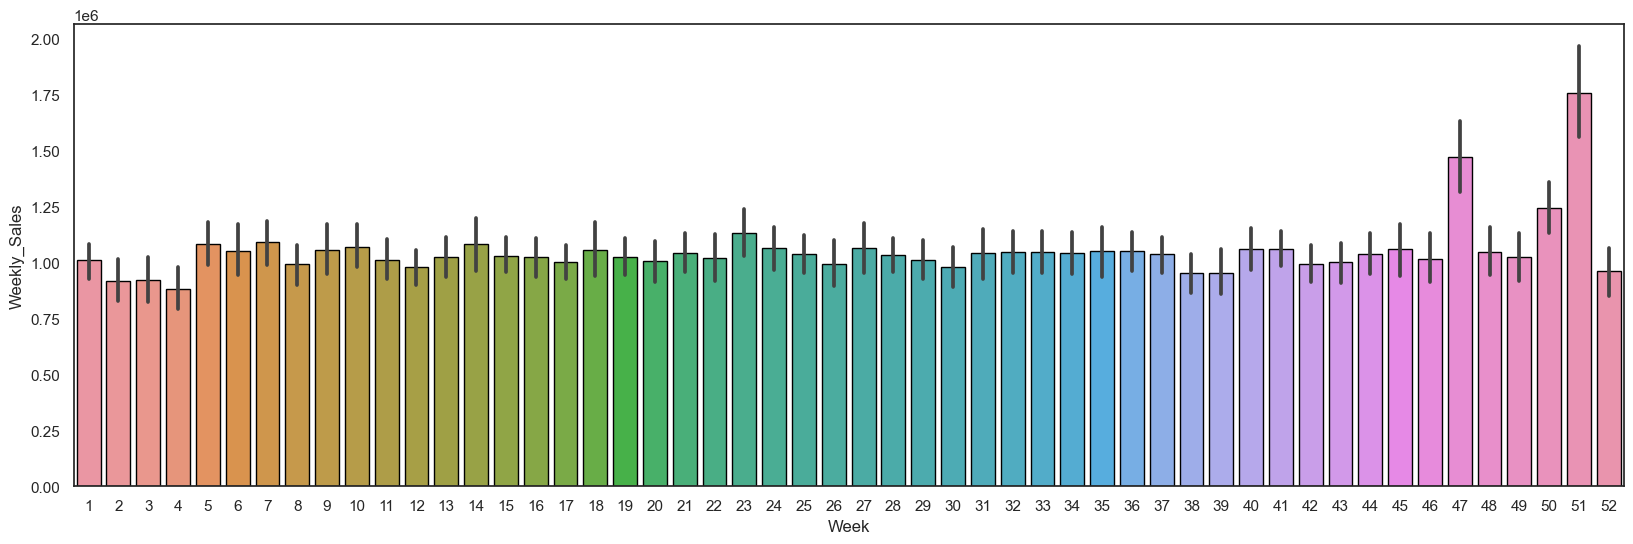

In [119]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Week', y='Weekly_Sales', data=data, edgecolor='black')
plt.show()

Inference:
From graphs, it is seen that 51th week and 47th weeks have significantly higher averages as Christmas, Thankgiving effect.

**Monthly view of Sales

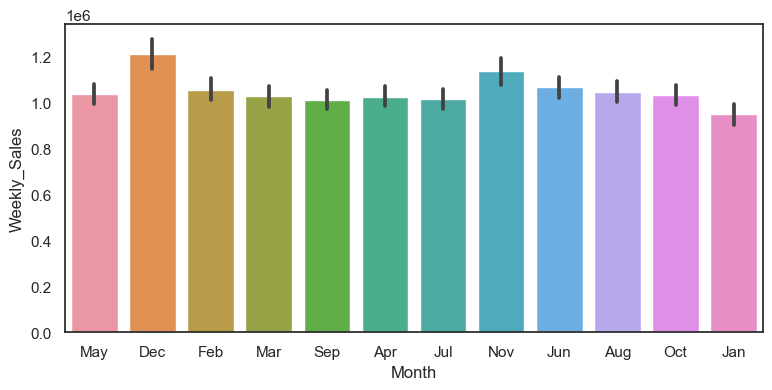

In [117]:
plt.figure(figsize=(9,4))
fig = sns.barplot(x='Month', y='Weekly_Sales', data=data)


The sales data reveals that the peak sales months are December and November, aligning with expectations. While the highest individual values are attributed to the Thanksgiving holiday, the overall average sales for December surpass other months.

**Yearly Sales

In [34]:
import plotly.express as px

# Assuming 'data' is your DataFrame
fig_yearly_sales = px.bar(data.groupby("Year")[["Weekly_Sales"]].sum().reset_index(),
                          x="Year", y="Weekly_Sales", title="Yearly view of sales",
                          labels={"Weekly_Sales": "Total Weekly Sales", "Year": "Years"},
                          color="Year",  # Add color parameter for different colors
                          color_discrete_map={2010: 'blue', 2011: 'green', 2012: 'orange'},  # Specify colors for each year
                          height=500)

fig_yearly_sales.show()


Here, overall monthly sales are higher in the month of December while the yearly sales in the year 2011 are the highest.

**The highest and lowest average revenues over the years

In [98]:
sales_store = data.groupby('Store').sum().reset_index()

top_sales_store = sales_store.sort_values('Weekly_Sales',ascending=False).head()[['Store','Weekly_Sales']]
bottom_sales_store = sales_store.sort_values('Weekly_Sales',ascending=True).head()[['Store','Weekly_Sales']]

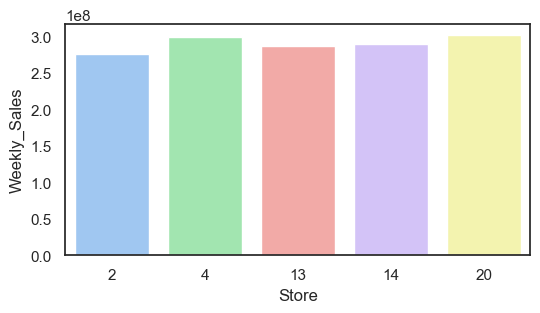

In [99]:
plt.figure(figsize=(6,3))
sns.barplot(x='Store',y='Weekly_Sales',data=top_sales_store)
plt.show()

Store: 2, 4, 13, 14, 20 have higher sales as compare to other stores in all the years.

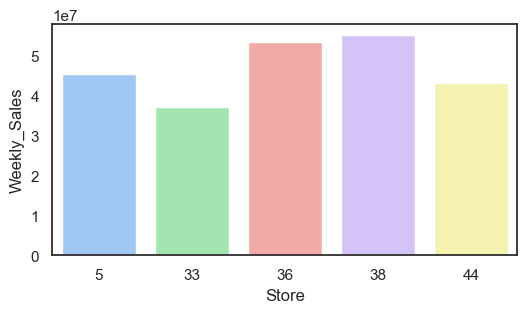

In [100]:
plt.figure(figsize=(6,3))
sns.barplot(x='Store',y='Weekly_Sales',data=bottom_sales_store)
plt.show()

Store: 5,33, 36, 38, 44 have very less sales as compare to other stores in all the years.

**Fuel Price, CPI , Unemployment , Temperature Effects

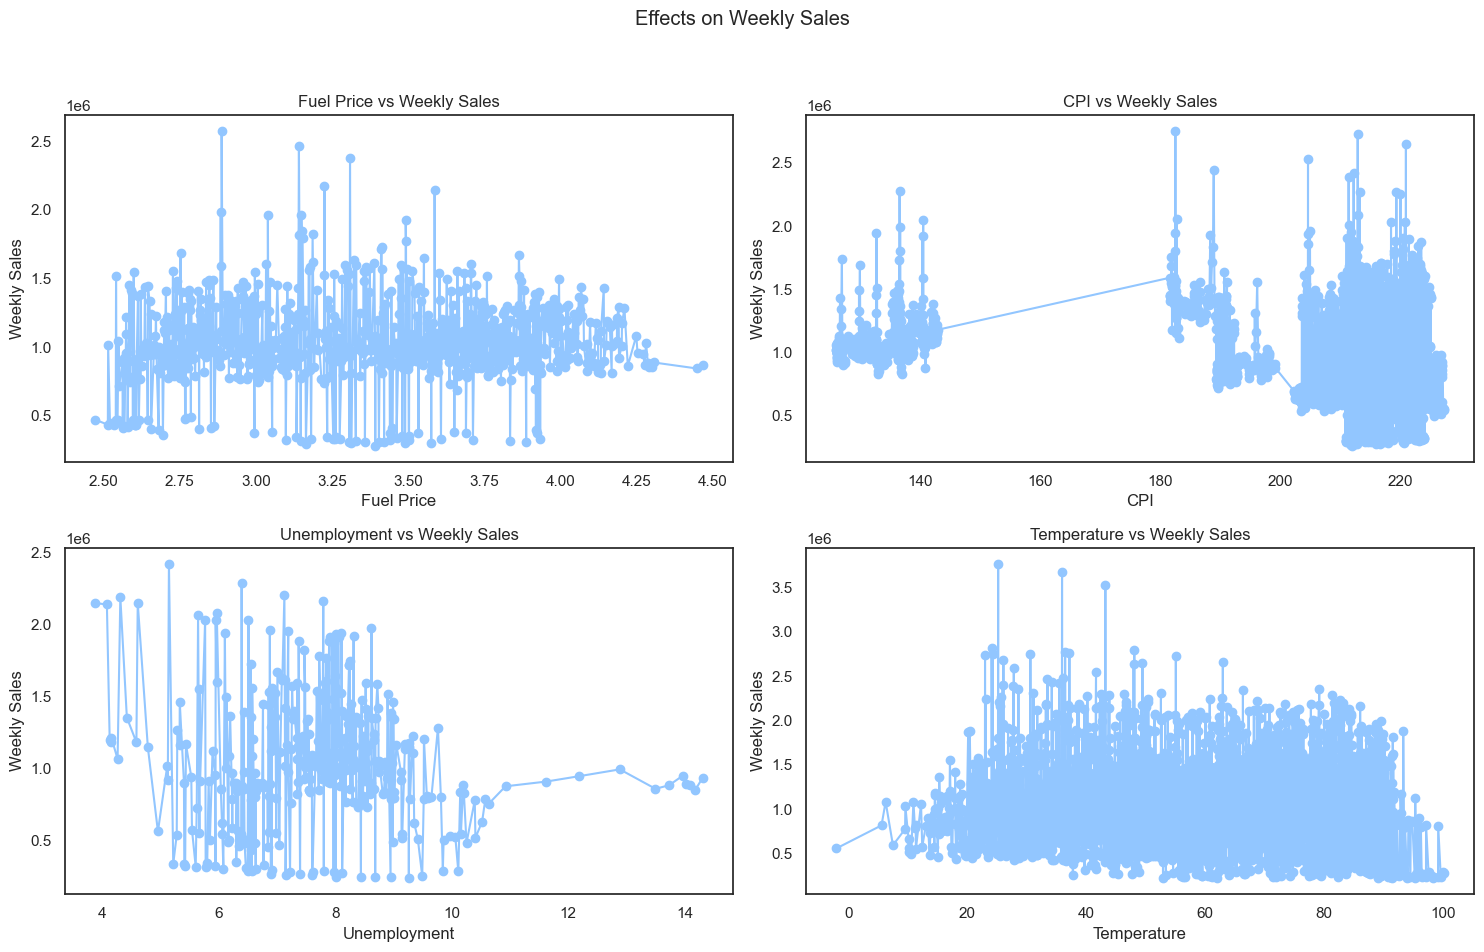

In [103]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Effects on Weekly Sales')

# Plot Fuel_Price
fuel_price = pd.pivot_table(data, values='Weekly_Sales', index='Fuel_Price', aggfunc='mean')
axes[0, 0].plot(fuel_price.index, fuel_price['Weekly_Sales'], marker='o', linestyle='-')
axes[0, 0].set_title('Fuel Price vs Weekly Sales')
axes[0, 0].set_xlabel('Fuel Price')
axes[0, 0].set_ylabel('Weekly Sales')

# Plot CPI
cpi = pd.pivot_table(data, values='Weekly_Sales', index='CPI', aggfunc='mean')
axes[0, 1].plot(cpi.index, cpi['Weekly_Sales'], marker='o', linestyle='-')
axes[0, 1].set_title('CPI vs Weekly Sales')
axes[0, 1].set_xlabel('CPI')
axes[0, 1].set_ylabel('Weekly Sales')

# Plot Unemployment
unemployment = pd.pivot_table(data, values='Weekly_Sales', index='Unemployment', aggfunc='mean')
axes[1, 0].plot(unemployment.index, unemployment['Weekly_Sales'], marker='o', linestyle='-')
axes[1, 0].set_title('Unemployment vs Weekly Sales')
axes[1, 0].set_xlabel('Unemployment')
axes[1, 0].set_ylabel('Weekly Sales')

# Plot Temperature
temperature = pd.pivot_table(data, values='Weekly_Sales', index='Temperature', aggfunc='mean')
axes[1, 1].plot(temperature.index, temperature['Weekly_Sales'], marker='o', linestyle='-')
axes[1, 1].set_title('Temperature vs Weekly Sales')
axes[1, 1].set_xlabel('Temperature')
axes[1, 1].set_ylabel('Weekly Sales')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


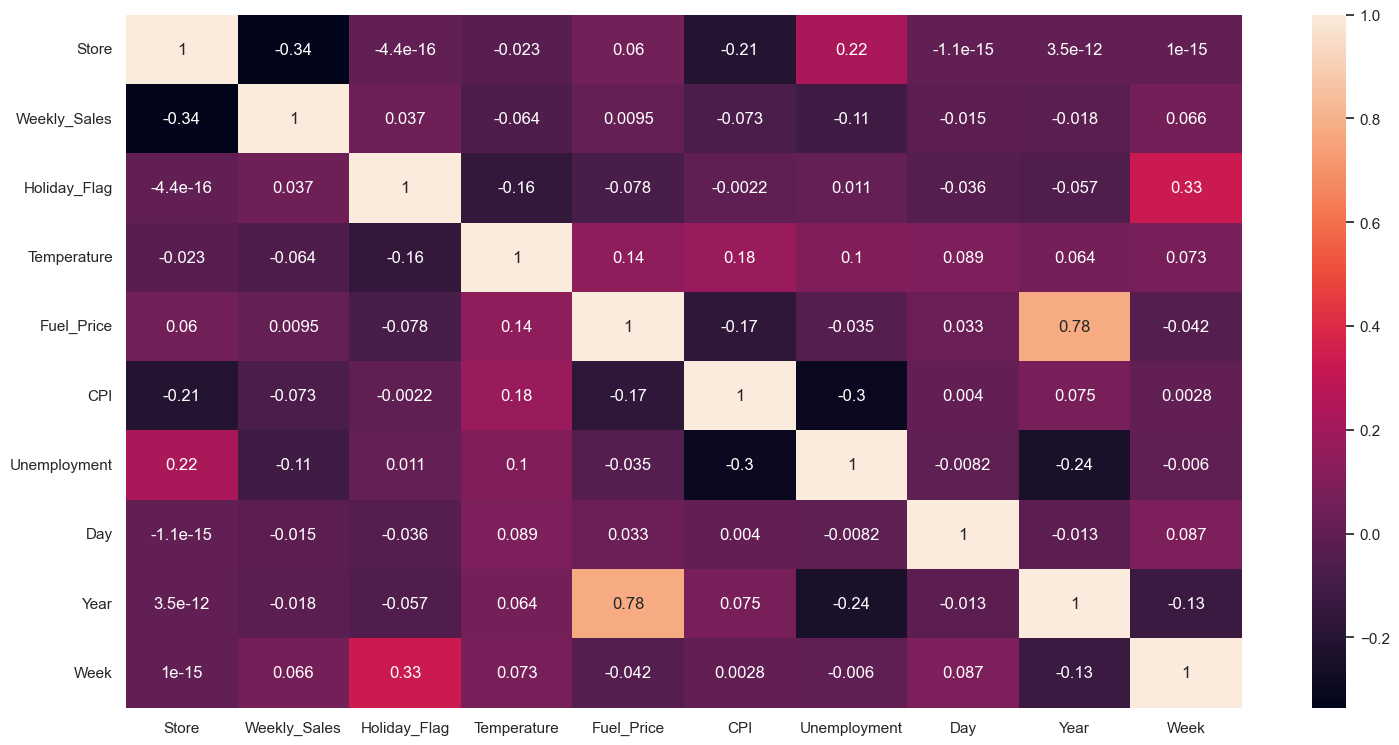

In [107]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(), annot=True);

Inference:

CPI, Temperature, and Fuel Price:

No clear patterns found in the graphs.
Weekly sales don't seem to have a strong connection with these factors.
Further analysis might be needed for a deeper understanding.
Unemployment Rate:

Graph suggests a negative correlation with weekly sales.
Indicates that as unemployment rate increases, weekly sales might decrease.
This relationship could be explored further for meaningful insights.
Data Gap in CPI:

There's a missing chunk of CPI data between 140-180.
Gaps in data can affect the analysis.
Having complete data is crucial for accurate conclusions.
These observations highlight the need for more detailed investigation and the importance of comprehensive data coverage in drawing meaningful conclusions.


In [132]:
# Creating a store-wise sales dataframe for time series analysis
ts_df = data.pivot_table(index='Date', columns='Store', values='Weekly_Sales', aggfunc='sum')

# Rename the columns for clarity
ts_df.columns = ['store_' + str(col) for col in ts_df.columns]


In [134]:
ts_df.head(10)

store_1     store_2    store_3     store_4    store_5  \
Date                                                                   
2010-01-10  1453329.50  1827440.43  358784.10  1842821.02  283178.12   
2010-02-04  1594968.28  2066187.72  423294.40  1979247.12  331406.00   
2010-02-07  1492418.14  2003940.64  381151.72  1881337.21  305993.27   
2010-02-19  1611968.17  2124451.54  421642.19  2049860.26  303447.57   
2010-02-26  1409727.59  1865097.27  407204.86  1925728.84  270281.63   
2010-03-09  1540163.53  1904608.09  366473.97  1935857.58  323798.00   
2010-03-12  1548033.78  2015781.27  476420.77  2102530.17  344490.88   
2010-03-19  1472515.79  1946070.88  375328.59  1897429.36  281706.41   
2010-03-26  1404429.92  1750197.81  359949.27  1762539.30  273282.97   
2010-04-06  1615524.71  2102539.93  396968.80  1903290.58  337825.89   

               store_6    store_7    store_8    store_9    store_10  ...  \
Date                                                                 ...   
2010-01-10  1328468.89  448998.73  804105.49  495692.19  1645892.97  ...   
2010-02-04  1770333.90  561145.14  914500.91  545206.32  2138651.97  ...   
2010-02-07  1759777.25  575570.77  852333.75  528832.54  1845893.87  ...   
2010-02-19  1567138.07  506760.54  963960.37  511327.90  2113432.58  ...   
2010-02-26  1432953.21  496083.24  847592.11  473773.27  2006774.96  ...   
2010-03-09  1510925.32  532765.05  899036.47  511049.06  1766331.45  ...   
2010-03-12  1677067.24  552811.62  952766.93  578164.82  2251206.64  ...   
2010-03-19  1693058.91  574450.23  839911.00  485744.61  1946875.06  ...   
2010-03-26  1472033.38  514731.60  772539.12  484946.56  1893532.46  ...   
2010-04-06  1857380.09  509183.22  958225.41  586061.46  1931406.28  ...   

             store_36   store_37   store_38    store_39    store_40  \
Date                                                                  
2010-01-10  422169.47  529877.93  360256.58  1219583.91   891152.33   
2010-02-04  435972.82  540189.70  368929.55  1463942.62  1041202.13   
2010-02-07  434252.15  498292.53  361181.48  1352547.70  1087578.78   
2010-02-19  470281.03  510382.50  327237.92  1230591.97   916289.20   
2010-02-26  447519.44  513615.82  334222.73  1168582.02   863917.41   
2010-03-09  431294.45  510427.53  377096.55  1345167.61   976453.34   
2010-03-12  360266.09  508213.14  351925.36  1431910.98  1000582.06   
2010-03-19  428851.99  460020.74  333025.47  1301590.13   894865.30   
2010-03-26  404438.51  515777.97  335858.11  1235094.66   873354.58   
2010-04-06  471088.88  479195.02  376184.88  1512207.95  1052429.03   

              store_41   store_42   store_43   store_44   store_45  
Date                                                                
2010-01-10  1109216.35  481523.93  657108.77  300152.45  690007.76  
2010-02-04  1168826.39  505907.41  650102.80  286197.50  877235.96  
2010-02-07  1273279.79  507168.80  667353.79  300628.19  800147.84  
2010-02-19  1052034.74  508794.87  658997.55  267956.30  841264.04  
2010-02-26   991941.73  491510.58  618702.79  273079.07  741891.65  
2010-03-09  1223355.50  524658.06  689326.91  295880.12  790144.70  
2010-03-12  1220115.75  500250.80  557543.62  264214.12  879244.90  
2010-03-19  1006597.69  519914.10  668098.49  269624.20  773819.49  
2010-03-26  1015196.46  478021.68  623097.93  276279.49  782563.38  
2010-04-06  1305068.10  556046.12  682012.53  282351.82  837548.62  

[10 rows x 45 columns]

Time Series

In [138]:
train = ts_df.loc[ts_df.index < '2011-12-01']
test = ts_df.loc[ts_df.index >= '2011-12-01']

In [139]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=7*2, gap=0)
ts_df = ts_df.sort_index()

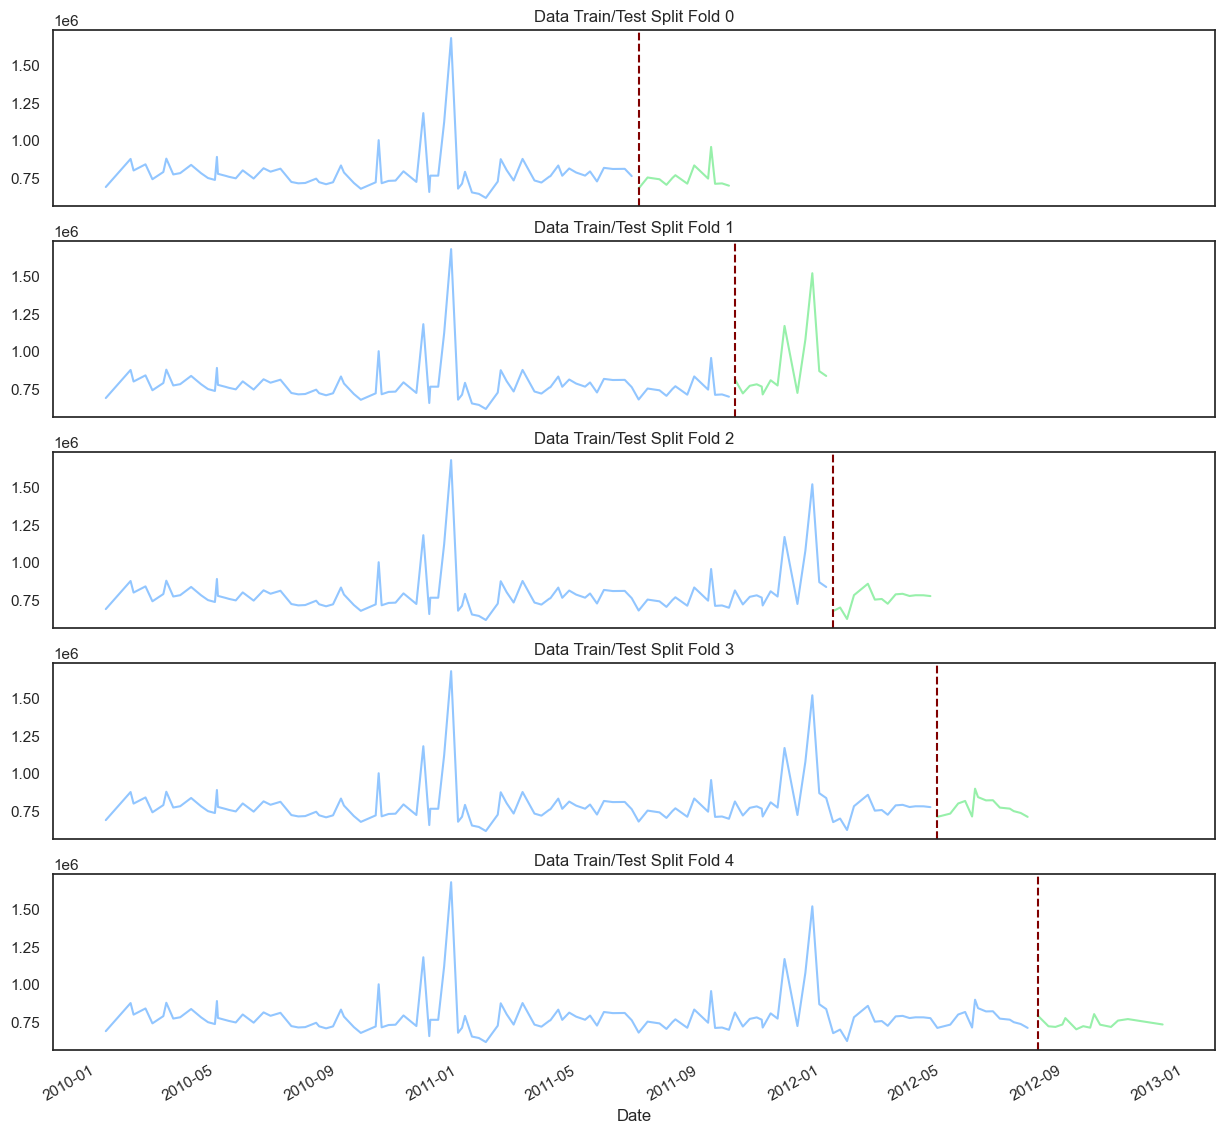

In [140]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

# ts_df = ts_df.astype('int64')
fold = 0
for train_idx, val_idx in tss.split(ts_df):
    train = ts_df.iloc[train_idx]
    test = ts_df.iloc[val_idx]
    train['store_45'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['store_45'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='maroon', ls='--')
    fold += 1
plt.show()

1.Data Cross-Validation:

"Checked and cross-validated the data after preprocessing" means that you have carefully examined and validated the dataset after any necessary preprocessing steps.

2.Leakage Check:

"Found that there is no leakage" implies that there are no instances of data leakage. Data leakage refers to the unintentional use of information in the training data that should not be known during the model training. In this context, it suggests that the model is trained on the appropriate information without any inadvertent inclusion of future information.

3.Limited Data for Each Store:

"Already we have less data for the sales of each store" indicates that the dataset contains a relatively small amount of data for the sales of each individual store. This could be a limitation, but it also implies that the model is working with the available data.

4.Intersection and Leakage Exclusion:

"No chance of any intersection or leakage in it" emphasizes that, due to the limited data and careful preprocessing, the dataset is free from issues like data intersection (overlapping or shared data between training and test sets) and data leakage (using information inappropriately).

5.No Further Manipulation Required:

"No more manipulation required" suggests that, based on the checks and validations performed, the dataset is deemed suitable for further analysis and modeling. Additional data manipulation or cleaning steps are not necessary at this point.
In summary, your inference indicates that the dataset has been thoroughly examined, potential issues such as leakage have been ruled out, and the available data is considered appropriate for the subsequent steps in the analysis or modeling process.

# 4. Feature Creation/Selection/Extraction

4.1 Creating features on the basis of date time

In [231]:
def create_features(data):
    """
    Create time series features based on time series index.
    """
    df = data.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

ts_df_new = create_features(ts_df)
ts_df_new.head()

store_1     store_2    store_3     store_4    store_5  \
Date                                                                   
2010-01-10  1453329.50  1827440.43  358784.10  1842821.02  283178.12   
2010-02-04  1594968.28  2066187.72  423294.40  1979247.12  331406.00   
2010-02-07  1492418.14  2003940.64  381151.72  1881337.21  305993.27   
2010-02-19  1611968.17  2124451.54  421642.19  2049860.26  303447.57   
2010-02-26  1409727.59  1865097.27  407204.86  1925728.84  270281.63   

               store_6    store_7    store_8    store_9    store_10  ...  \
Date                                                                 ...   
2010-01-10  1328468.89  448998.73  804105.49  495692.19  1645892.97  ...   
2010-02-04  1770333.90  561145.14  914500.91  545206.32  2138651.97  ...   
2010-02-07  1759777.25  575570.77  852333.75  528832.54  1845893.87  ...   
2010-02-19  1567138.07  506760.54  963960.37  511327.90  2113432.58  ...   
2010-02-26  1432953.21  496083.24  847592.11  473773.27  2006774.96  ...   

             store_43   store_44   store_45  dayofweek  quarter  month  year  \
Date                                                                           
2010-01-10  657108.77  300152.45  690007.76          6        1      1  2010   
2010-02-04  650102.80  286197.50  877235.96          3        1      2  2010   
2010-02-07  667353.79  300628.19  800147.84          6        1      2  2010   
2010-02-19  658997.55  267956.30  841264.04          4        1      2  2010   
2010-02-26  618702.79  273079.07  741891.65          4        1      2  2010   

            dayofyear  dayofmonth  weekofyear  
Date                                           
2010-01-10         10          10           1  
2010-02-04         35           4           5  
2010-02-07         38           7           5  
2010-02-19         50          19           7  
2010-02-26         57          26           8  

[5 rows x 52 columns]

In [230]:
ts_df_new.columns

Index(['store_1', 'store_2', 'store_3', 'store_4', 'store_5', 'store_6',
       'store_7', 'store_8', 'store_9', 'store_10', 'store_11', 'store_12',
       'store_13', 'store_14', 'store_15', 'store_16', 'store_17', 'store_18',
       'store_19', 'store_20', 'store_21', 'store_22', 'store_23', 'store_24',
       'store_25', 'store_26', 'store_27', 'store_28', 'store_29', 'store_30',
       'store_31', 'store_32', 'store_33', 'store_34', 'store_35', 'store_36',
       'store_37', 'store_38', 'store_39', 'store_40', 'store_41', 'store_42',
       'store_43', 'store_44', 'store_45', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [143]:
FEATURES = ['dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']
TARGET = 'store_1'

# creating a dataframe for the store_1 to tarain the model
ts_df_store_1 = pd.DataFrame()
ts_df_store_1[TARGET] = ts_df_new['store_1']
ts_df_store_1[FEATURES] = ts_df_new[FEATURES]

ts_df_store_1.head()


store_1  dayofweek  quarter  month  year  dayofyear  \
Date                                                                 
2010-01-10  1453329.50          6        1      1  2010         10   
2010-02-04  1594968.28          3        1      2  2010         35   
2010-02-07  1492418.14          6        1      2  2010         38   
2010-02-19  1611968.17          4        1      2  2010         50   
2010-02-26  1409727.59          4        1      2  2010         57   

            dayofmonth  weekofyear  
Date                                
2010-01-10          10           1  
2010-02-04           4           5  
2010-02-07           7           5  
2010-02-19          19           7  
2010-02-26          26           8

In [145]:
def add_lags(df):
    df['lag1'] = df['store_1'] - df['store_1'].shift(1)
    df['lag2'] = df['store_1'] - df['store_1'].shift(2)
    df['lag3'] = df['store_1'] - df['store_1'].shift(3)
    
    return df

ts_df_store_1 = add_lags(ts_df_store_1)
ts_df_store_1.head()

store_1  dayofweek  quarter  month  year  dayofyear  \
Date                                                                 
2010-01-10  1453329.50          6        1      1  2010         10   
2010-02-04  1594968.28          3        1      2  2010         35   
2010-02-07  1492418.14          6        1      2  2010         38   
2010-02-19  1611968.17          4        1      2  2010         50   
2010-02-26  1409727.59          4        1      2  2010         57   

            dayofmonth  weekofyear       lag1      lag2       lag3  
Date                                                                
2010-01-10          10           1        NaN       NaN        NaN  
2010-02-04           4           5  141638.78       NaN        NaN  
2010-02-07           7           5 -102550.14  39088.64        NaN  
2010-02-19          19           7  119550.03  16999.89  158638.67  
2010-02-26          26           8 -202240.58 -82690.55 -185240.69

In [146]:
ts_df_store_1['lag1'] = ts_df_store_1['lag1'].fillna(ts_df_store_1['lag1'].median())
ts_df_store_1['lag2'] = ts_df_store_1['lag2'].fillna(ts_df_store_1['lag2'].median())
ts_df_store_1['lag3'] = ts_df_store_1['lag3'].fillna(ts_df_store_1['lag3'].median())

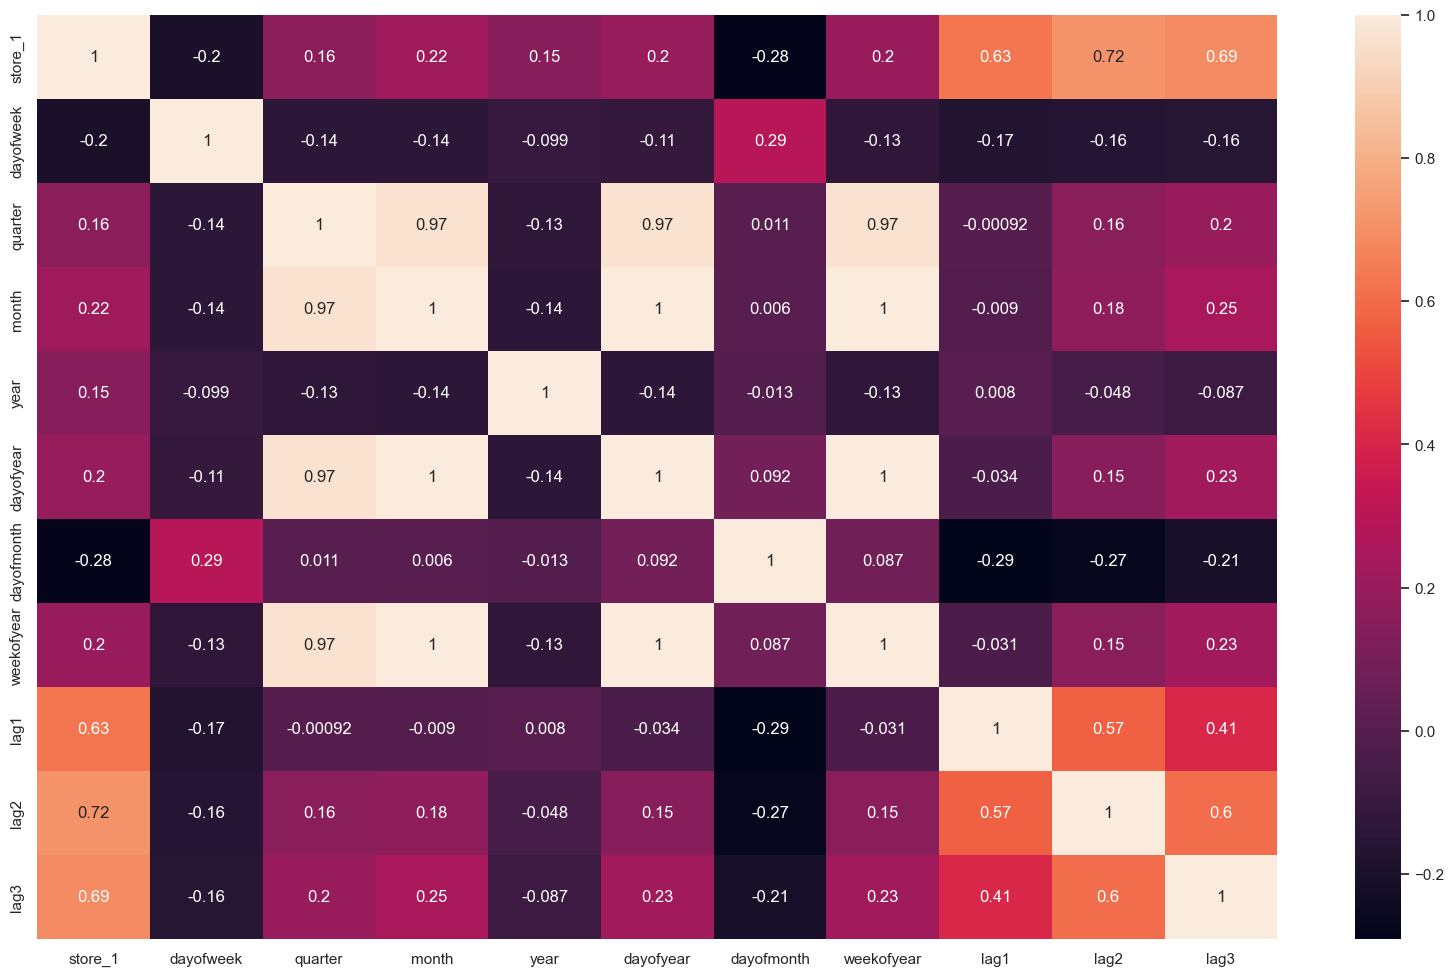

In [147]:
plt.figure(figsize=(20,12))
sns.heatmap(ts_df_store_1.corr(), annot=True);

In [148]:
ts_df_store_1['weekofyear'] = ts_df_store_1['weekofyear'].astype("int64")
ts_df_store_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-01-10 to 2012-12-10
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   store_1     143 non-null    float64
 1   dayofweek   143 non-null    int64  
 2   quarter     143 non-null    int64  
 3   month       143 non-null    int64  
 4   year        143 non-null    int64  
 5   dayofyear   143 non-null    int64  
 6   dayofmonth  143 non-null    int64  
 7   weekofyear  143 non-null    int64  
 8   lag1        143 non-null    float64
 9   lag2        143 non-null    float64
 10  lag3        143 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 13.4 KB


# 5. Predictive Modelling with Regressor algorithms and sales forecasting

In [149]:
ts_df_store_1

store_1  dayofweek  quarter  month  year  dayofyear  \
Date                                                                 
2010-01-10  1453329.50          6        1      1  2010         10   
2010-02-04  1594968.28          3        1      2  2010         35   
2010-02-07  1492418.14          6        1      2  2010         38   
2010-02-19  1611968.17          4        1      2  2010         50   
2010-02-26  1409727.59          4        1      2  2010         57   
...                ...        ...      ...    ...   ...        ...   
2012-10-08  1592409.97          0        4     10  2012        282   
2012-10-19  1508068.77          4        4     10  2012        293   
2012-10-26  1493659.74          4        4     10  2012        300   
2012-11-05  1611096.05          0        4     11  2012        310   
2012-12-10  1573072.81          0        4     12  2012        345   

            dayofmonth  weekofyear        lag1       lag2        lag3  
Date                                                                   
2010-01-10          10           1  -12190.705  -27868.15   20996.285  
2010-02-04           4           5  141638.780  -27868.15   20996.285  
2010-02-07           7           5 -102550.140   39088.64   20996.285  
2010-02-19          19           7  119550.030   16999.89  158638.670  
2010-02-26          26           8 -202240.580  -82690.55 -185240.690  
...                ...         ...         ...        ...         ...  
2012-10-08           8          41 -210067.460  155350.71   86283.910  
2012-10-19          19          42  -84341.200 -294408.66   71009.510  
2012-10-26          26          43  -14409.030  -98750.23 -308817.690  
2012-11-05           5          45  117436.310  103027.28   18686.080  
2012-12-10          10          50  -38023.240   79413.07   65004.040  

[143 rows x 11 columns]

# 5.1 Fitting XGBRegressor Model

5.1.1 Cross Validating

In [151]:
train = ts_df_store_1.loc[ts_df_store_1.index < '2011-12-01']
test = ts_df_store_1.loc[ts_df_store_1.index >= '2011-12-01']

tss = TimeSeriesSplit(n_splits=5, test_size=7*2, gap=0)
ts_df_store_1 = ts_df_store_1.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(ts_df_store_1):
    train = ts_df_store_1.iloc[train_idx]
    test = ts_df_store_1.iloc[val_idx]

    FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3']

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.75, booster='dart',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    from sklearn.metrics import mean_squared_error

    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:1520981.93368	validation_1-rmse:1493252.62707
[100]	validation_0-rmse:581258.84866	validation_1-rmse:549733.69157
[200]	validation_0-rmse:236977.00950	validation_1-rmse:214017.16268
[300]	validation_0-rmse:108826.89681	validation_1-rmse:97736.67231
[400]	validation_0-rmse:59210.71170	validation_1-rmse:56713.37481
[500]	validation_0-rmse:37676.43080	validation_1-rmse:49180.40747
[600]	validation_0-rmse:27152.93459	validation_1-rmse:48078.71742
[700]	validation_0-rmse:21551.01880	validation_1-rmse:47312.13815
[800]	validation_0-rmse:18491.06958	validation_1-rmse:46938.70490
[900]	validation_0-rmse:15930.27822	validation_1-rmse:46574.75537
[999]	validation_0-rmse:13489.06807	validation_1-rmse:46062.23951
[0]	validation_0-rmse:1516560.19475	validation_1-rmse:1658043.80195
[100]	validation_0-rmse:576849.69755	validation_1-rmse:721340.50500
[200]	validation_0-rmse:232170.78959	validation_1-rmse:356785.57244
[300]	validation_0-rmse:104982.24782	validation_1-rmse:235475.6

In [152]:
print(f'Score across folds {np.mean(scores):0.2f}')
print(f'Fold scores:{scores}')

Score across folds 71488.19
Fold scores:[46062.23373636142, 151599.41067687186, 61081.35940302419, 69070.30285656036, 29627.65375758507]


# 5.1.2 Fitting XGBRegressor

In [153]:
FEATURES = FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear',
                       'dayofmonth', 'weekofyear', 'lag1', 'lag2', 'lag3']
TARGET = 'store_1'

X_all = ts_df_store_1[FEATURES]
y_all = ts_df_store_1[TARGET]

reg = xgb.XGBRegressor(base_score=0.75, booster='dart',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)
y_pred = reg.predict(X_test)
score = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\n\nRMSE of XGBRegressor: {score}")


[0]	validation_0-rmse:1547644.16465
[100]	validation_0-rmse:584466.91256
[200]	validation_0-rmse:230732.53402
[300]	validation_0-rmse:100845.78447
[400]	validation_0-rmse:53428.20462
[500]	validation_0-rmse:36491.68285
[600]	validation_0-rmse:29246.62281
[700]	validation_0-rmse:25304.94799
[800]	validation_0-rmse:22700.44188
[900]	validation_0-rmse:20304.63373
[999]	validation_0-rmse:18688.18881


RMSE of XGBRegressor: 13323.749100435454


In [154]:
print(f"The mean of the target columns: {np.mean(ts_df_store_1['store_1'])}")
print(f"The difference between the actual and predicted values: {9405.146862738415/1555264.3975524476}")

The mean of the target columns: 1555264.3975524476
The difference between the actual and predicted values: 0.006047297731202162


In [155]:
import pickle

# Save the model using pickle
filename = 'xgb_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(reg, file)

# 5.2 Fitting Different Regressor Models

5.2.1 Splitting & scaling the dataset

In [156]:
# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled,y_all, test_size=0.2, random_state=50)

5.2.2 Defining a function to fit the models

In [157]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a model on training and test data.

    Parameters
    ----------
    model : object
        A scikit-learn estimator object.
    X_train : array-like or pd.DataFrame
        Training data with shape (n_samples, n_features).
    y_train : array-like
        Training labels with shape (n_samples,).
    X_test : array-like or pd.DataFrame
        Test data with shape (n_samples, n_features).
    y_test : array-like
        Test labels with shape (n_samples,).

    Returns
    -------
    rmse : float
        Root mean squared error between the test labels and the predictions.
    """
    # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # calculate RMSE
    rmse = np.sqrt(mse)
    return rmse

5.2.3 Defining the function to evaluated our model

In [158]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
    """
    This function takes a list of regressors, their names, and the training and test data as input
    and returns a dataframe with the names of the regressors and their root mean squared error (RMSE)
    on the test data.
    
    Parameters:
    -----------
    regressors (list): a list of scikit-learn compatible regression models
    regressor_names (list): a list of strings containing the names of the regression models
    X_train (pandas DataFrame): a pandas DataFrame containing the features for training the models
    y_train (pandas Series): a pandas Series containing the target values for training the models
    X_test (pandas DataFrame): a pandas DataFrame containing the features for testing the models
    y_test (pandas Series): a pandas Series containing the target values for testing the models
    
    Returns:
    --------
    pandas DataFrame: a dataframe containing the names of the regressors and their corresponding RMSE on the test data
    """
    
    # evaluate the models and compute their RMSE on the test data
    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]
    
    # create a dictionary mapping the names of the regressors to their RMSE
    regressor_rmses = dict(zip(regressor_names, rmses))
    
    # convert the dictionary to a pandas dataframe
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')
    
    # reset the index of the dataframe
    df = df.reset_index()
    
    # rename the columns of the dataframe
    df.columns = ['regressor_name', 'rmse']
    
     # sort the dataframe by RMSE in ascending order
    return df.sort_values('rmse', ignore_index=True)
         

# 5.2.4 Initialize the regressors models


In [165]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [167]:
# initialize the regressors
linear_regressor = LinearRegression(fit_intercept=False)
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),
("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor(n_estimators=500,
                                                   random_state=42,
                                                   criterion='friedman_mse',
                                                   loss='huber',
                                                   min_samples_split=2,
                                                   min_impurity_decrease=0.75, alpha=0.5)
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR(coef0=0.5, kernel='linear')
grad_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [168]:
# collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor, 
              decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor, 
              support_vector_regressor, knn_regressor, spline_regressor]

# collect the names of regressors
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression", 
                   "Elastic Net Regression", "Decision Tree Regression", "Random Forest Regression", 
                   "Boosted Tree Regression", "Neural Network Regression", "Support Vector Regression", 
                   "K-Nearest Neighbour Regression", "Spline Regression"]

# 5.2.5 Model building and its results

In [170]:
print('\033[1m Table of regressors and their RMSEs')
evaluate_regressors_rmses(regressors, regressor_names, Xtrain, ytrain, Xtest, ytest)

 Table of regressors and their RMSEs


regressor_name          rmse
0          Boosted Tree Regression  3.685584e+04
1   K-Nearest Neighbour Regression  5.039014e+04
2         Random Forest Regression  5.062968e+04
3            Polynomial Regression  6.465631e+04
4           Elastic Net Regression  7.357297e+04
5                 Lasso Regression  8.268713e+04
6                 Ridge Regression  8.290064e+04
7         Decision Tree Regression  8.678763e+04
8        Support Vector Regression  9.640470e+04
9                Spline Regression  1.849599e+05
10               Linear Regression  3.458898e+05
11       Neural Network Regression  1.531181e+06

5.2.6 Result Evaluation and its impact performance

In [171]:
# evaluate rmse for the regressors
rmse = evaluate_regressors_rmses(regressors, regressor_names, Xtrain, ytrain, Xtest, ytest)

In [173]:
# pick the best rmse
best_rmse = rmse.iloc[0]['rmse']
# compute the median of the weekly sales 
median_sale = ts_df_store_1['store_1'].median()
# compute percentage error
percent_deviation = round((best_rmse*100/median_sale), 2)
# print the result
print('Inference: The model has an average percentage error of {}%'.format(percent_deviation))


Inference: The model has an average percentage error of 2.4%


# 5.2.3 Saving Best Model

In [175]:
import pickle

# Save the model using pickle
filename = 'boosted_tree_regressor.pkl'
with open(filename, 'wb') as file:
    pickle.dump(boosted_tree_regressor, file)

# 6. Predictive Modelling with stats model algorithms and sales forecasting

**Key problems with the given dataset:

The 'Date' column is not in proper weekly sequence.

Required data preprocessing specifically for date column.

If we not perform it, then, it will cause error during the forecast or predictions, even it sometimes work but shows the forecasted data lying between year 1970.

To overcome this issue i have manipulated the date columns, re-checked, the dates are weekly formatted and exported it separately.

In [292]:
df_weekly= pd.read_csv(r"C:\Users\ABHIMANYUU\Downloads\Capstone-major-timeseries-EDA-SARIMAX-walmart_dataset-main\Capstone-major-timeseries-EDA-SARIMAX-walmart_dataset-main\walmart_store.csv")

In [293]:
df_weekly['Date'] = pd.to_datetime(df_weekly['Date'])

In [294]:

df_weekly.set_index('Date', inplace=True)

In [295]:
df_weekly['store_1']

Date
2010-02-05    1453329.50
2010-02-12    1594968.28
2010-02-19    1492418.14
2010-02-26    1611968.17
2010-03-05    1409727.59
                 ...    
2012-09-28    1592409.97
2012-10-05    1508068.77
2012-10-12    1493659.74
2012-10-19    1611096.05
2012-10-26    1573072.81
Name: store_1, Length: 143, dtype: float64

In [296]:
df_week_s1 = df_weekly.loc[:,['store_1']]

In [193]:
df_weekly['store_1']

Date
2010-01-10    1453329.50
2010-02-04    1594968.28
2010-02-07    1492418.14
2010-02-19    1611968.17
2010-02-26    1409727.59
                 ...    
2012-10-08    1592409.97
2012-10-19    1508068.77
2012-10-26    1493659.74
2012-11-05    1611096.05
2012-12-10    1573072.81
Name: store_1, Length: 143, dtype: float64

     6.2 Tests for Stationarity
A time series is stationary if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is not stationary.

A test for stationarity usually involves a unit root hypothesis test, where the null hypothesis H0
 is that the series is nonstationary, and contains a unit root. The alternate hypothesis H1
 supports stationarity. The augmented Dickey-Fuller test is to check the stationarity.

**Augmented Dickey-Fuller Test

An augmented Dickey–Fuller test ( ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

# from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis.")
        print("Reject the null hypothesis.")
        print("Data has no unit root and Time-series data is stationary.")
    else:
        print("Weak evidence against the null hypothesis.")
        print("Fail to reject the null hypothesis.")
        print("Data has a unit root and Time-series data is non-stationary.")

# Visualizing the 'store_1' data

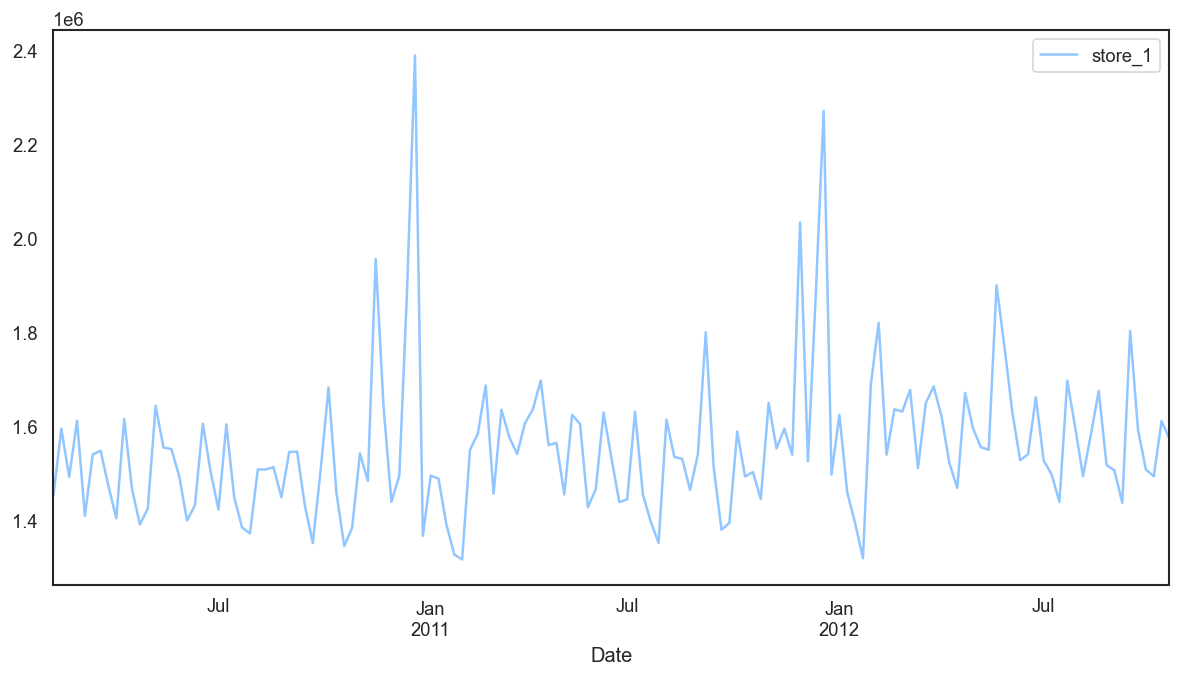

In [298]:
df_week_s1.plot(figsize=(12,6));

In [299]:
adf_test(df_week_s1)

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.595634e+00
p-value                 1.981888e-16
# lags used             0.000000e+00
# observations          1.420000e+02
critical value (1%)    -3.477262e+00
critical value (5%)    -2.882118e+00
critical value (10%)   -2.577743e+00
Strong evidence against the null hypothesis.
Reject the null hypothesis.
Data has no unit root and Time-series data is stationary.


# 6.3 Decomposing Weekly Data to Observe Seasonality

**Seasonal Decomposition

Statsmodels provides a seasonal decomposition tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.

We apply an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time.

A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate

# Running an ETS Decomposition

In [300]:

decomposed = decompose(df_week_s1['store_1'].values, 'additive', m=12) #decomposing of weekly data 

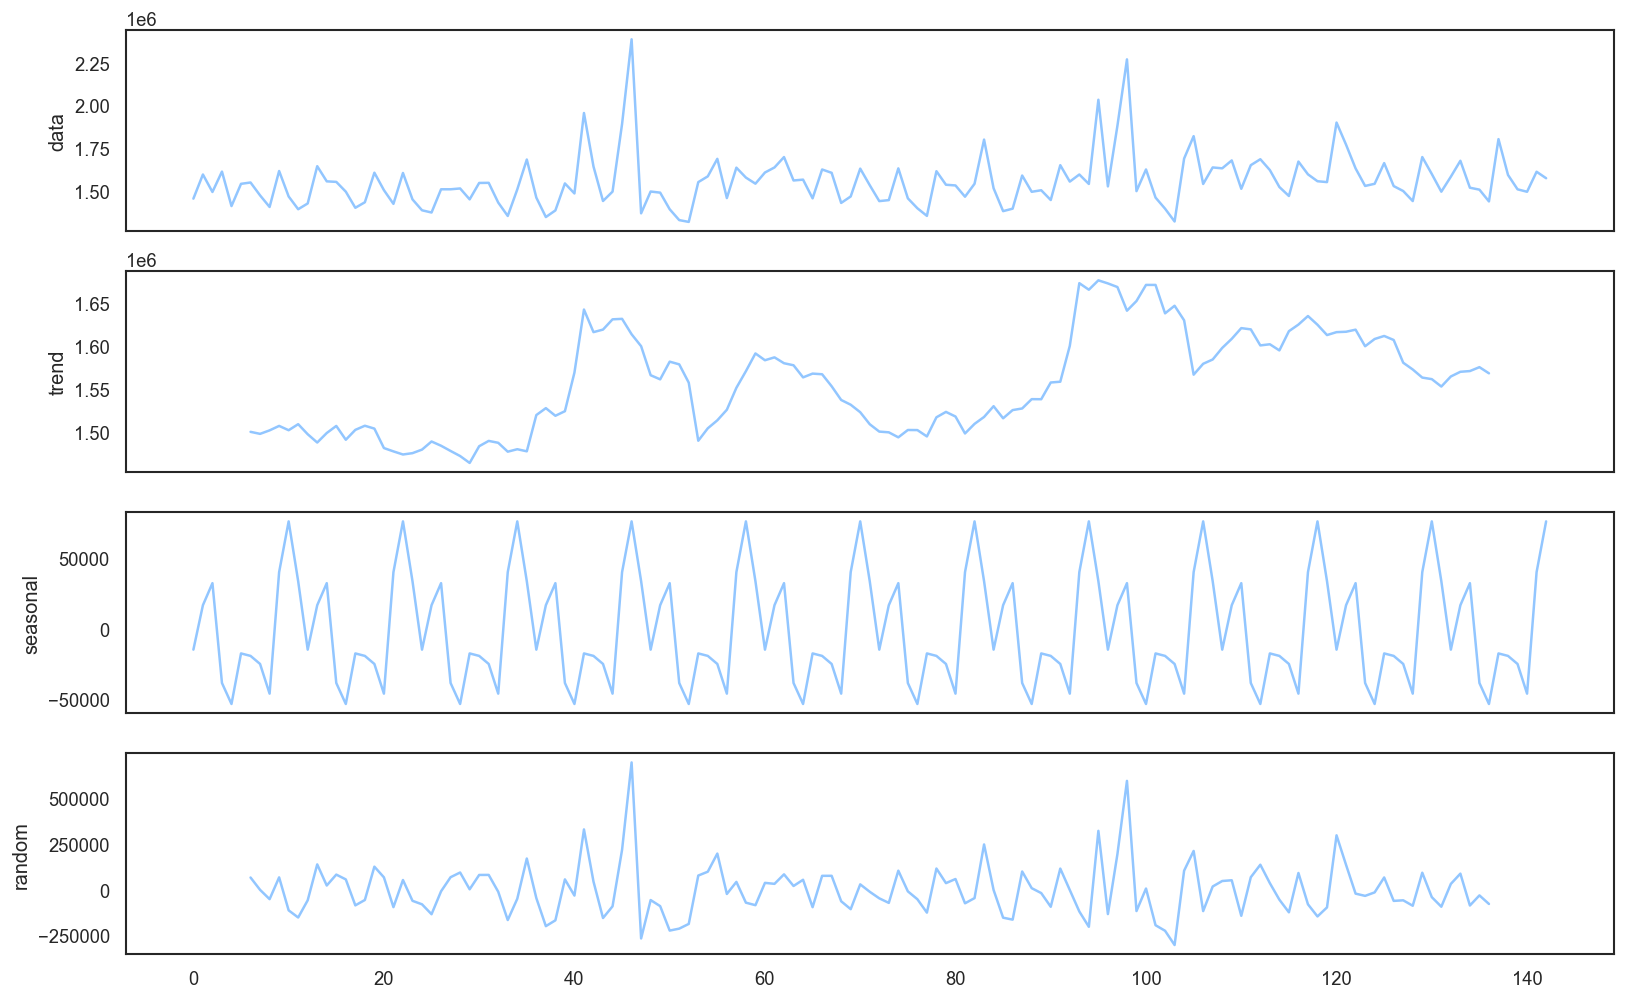

In [301]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()


<AxesSubplot:>

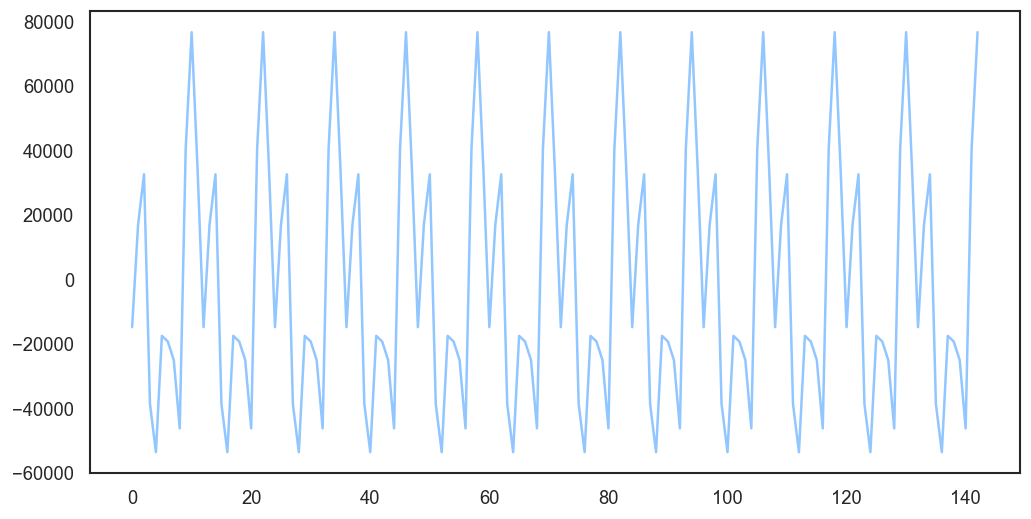

In [302]:
pd.Series(decomposed.seasonal).plot(figsize=(10,5))

Inference: Here, we can clearly see that is seasonal and repeating the pattern arround every 12 or 14 steps.

6.4 Choosing SARIMAX Orders
SARIMA (Seasonal Autoregressive Integrated Moving Average) and SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables) models are extensions of the ARIMA models that take into account the seasonal component of time series data. These models are commonly used for forecasting time series data with seasonal patterns.

SARIMA Model: The SARIMA model is an extension of the ARIMA model that incorporates seasonal components. It is defined by three main components: (p, d, q) for the non-seasonal part, (P, D, Q, s) for the seasonal part, and an optional constant term. Here's what each component represents:

p: Order of the autoregressive (AR) component, indicating the number of lagged observations to consider for predicting the current value.

d: Order of differencing, indicating the number of times the time series needs to be differenced to achieve stationarity.

q: Order of the moving average (MA) component, indicating the number of lagged forecast errors to consider for predicting the current value.

P: Order of the seasonal autoregressive (SAR) component, similar to p but for the seasonal component.

D: Order of seasonal differencing, similar to d but for the seasonal component.

Q: Order of the seasonal moving average (SMA) component, similar to q but for the seasonal component.

s: Seasonal period, representing the number of observations in a single season.

SARIMAX Model: The SARIMAX model is an extension of SARIMA that allows for the inclusion of exogenous variables in the model. In addition to the seasonal and non-seasonal components, SARIMAX models can incorporate external factors that may influence the time series being forecasted. These exogenous variables can provide additional information and improve the accuracy of the forecasts.



# Selecting Order using auto_arima

In [303]:
from pmdarima.arima import auto_arima
SARIMAX_model = auto_arima(df_week_s1['store_1'],seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3867.947, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3861.633, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3848.196, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3865.953, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3846.887, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3848.148, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3850.108, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=3835.628, Time=0.06 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=3837.076, Time=0.16 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3837.091, Time=0.14 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=3839.074, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3860.089, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=3836.267, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[12]

In [304]:
SARIMAX_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1912.789
Date:                Fri, 17 Nov 2023   AIC                           3831.578
Time:                        00:18:33   BIC                           3840.446
Sample:                    02-05-2010   HQIC                          3835.182
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5923      0.039    -15.200      0.000      -0.669      -0.516
ma.L2         -0.3195      0.050     -6.387      0.000      -0.418      -0.221
sigma2      2.808e+10   4.59e-13   6.12e+22      0.000    2.81e+10    2.81e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                73.91
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             1.12
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.03e+37. Standard errors may be unstable.
"""

# Selecting Order using ACF & PACF plot


I have performed the ADF Test and the p-value is less then 0.05, as given data is already stationary.

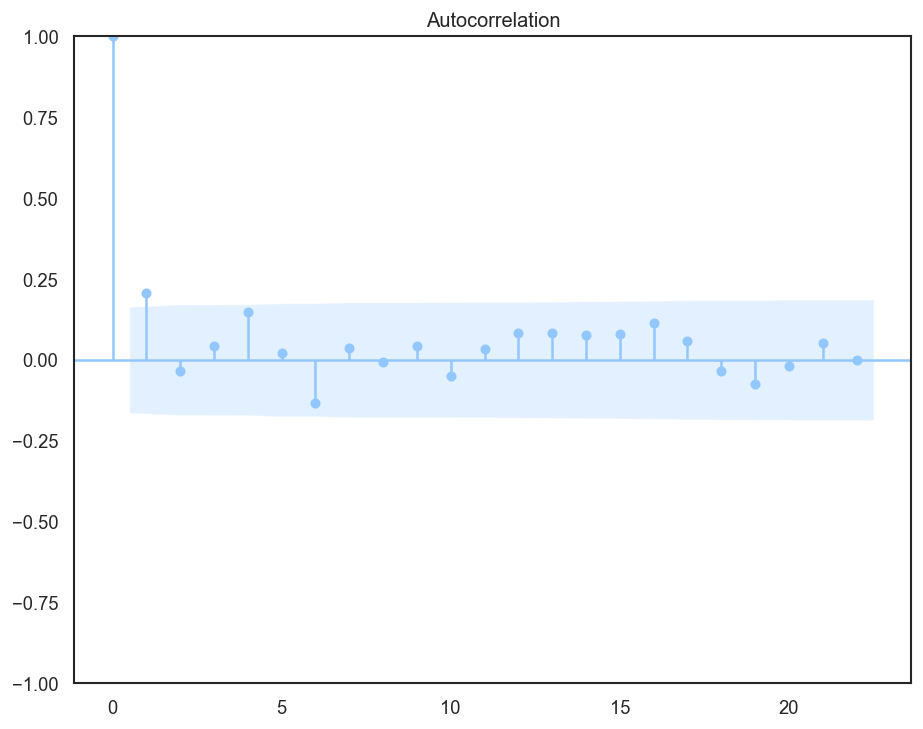

In [305]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(ts_df['store_1']);

Here we can see that 2 of the lags are out of the significance limit so we can say that the optimal value of our q (MA) is 2.

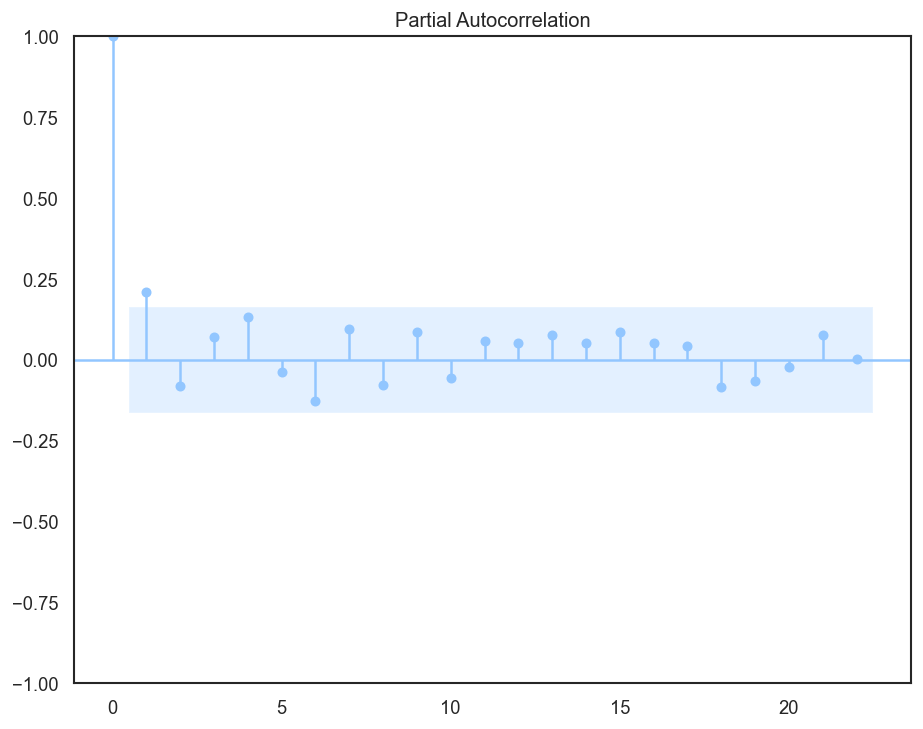

In [306]:

plot_pacf(ts_df['store_1']);


Here we can see that the first lag is significantly out of the limit and the second one is also out of the significant limit but it is not that far so we can select the order of the p as 0 or 1.

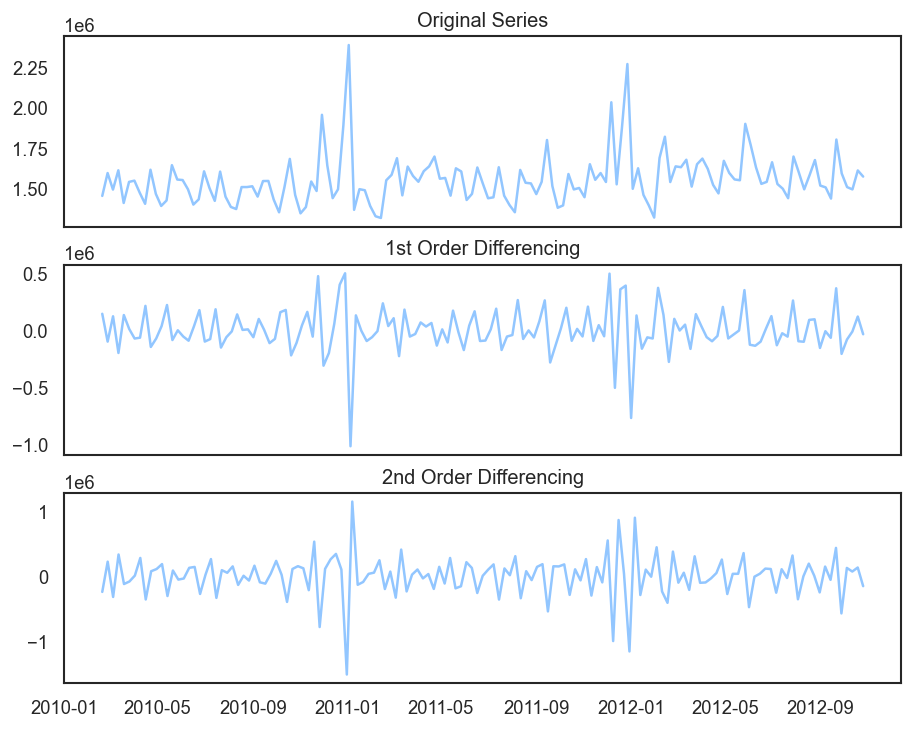

In [307]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df_week_s1.store_1); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df_week_s1.store_1.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df_week_s1.store_1.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

Here we can see how the time series has become stationary. One thing which is noticeable here is in first-order differencing we have fewer noises in the data while after 1st order there is an increase in the noise. So we can select 1st order differencing for our model. We can also verify this using an autocorrelation plot.

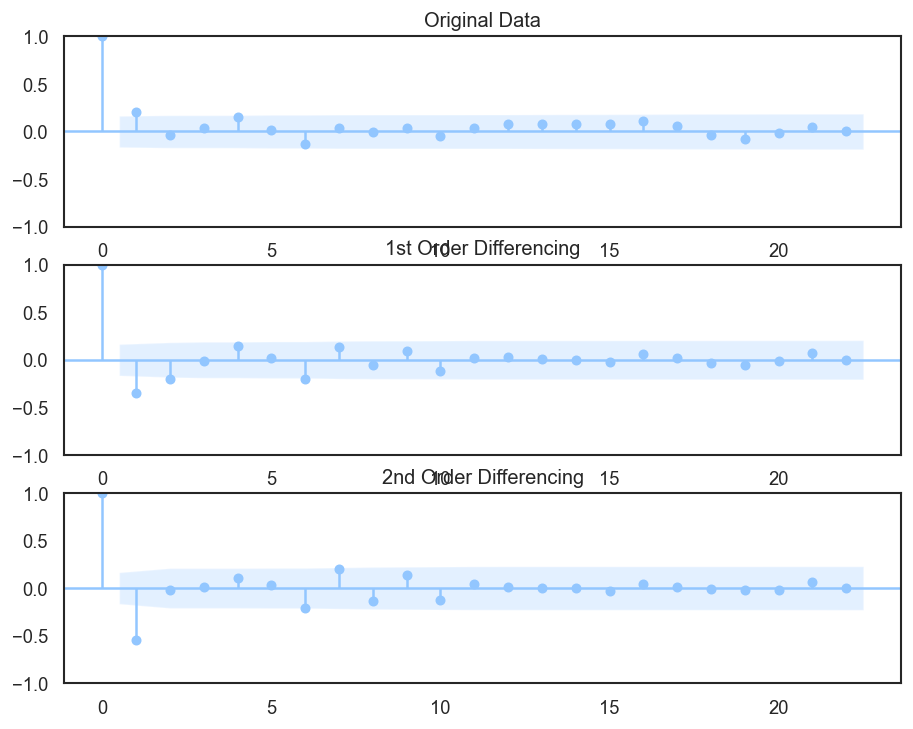

In [308]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df_week_s1.store_1, ax=ax1, title='Original Data');
plot_acf(df_week_s1.store_1.diff().dropna(), ax=ax2, title='1st Order Differencing');
plot_acf(df_week_s1.store_1.diff().diff().dropna(), ax=ax3, title='2nd Order Differencing');

For non-seasonal data

p=0 or 1, d=1, q=2

# Splitting the Train & Test set

In [309]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2012,1,13)
test_dataset_end=datetime(2012,10,26)

ts_train = df_week_s1[:train_dataset_end]
ts_test = df_week_s1[train_dataset_end+timedelta(days=7):test_dataset_end]

In [310]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(ts_train, order=(0,2,2), seasonal_order=(0,1,2,12) )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            store_1   No. Observations:                  102
Model:             SARIMAX(0, 2, 2)x(0, 1, 2, 12)   Log Likelihood               -1217.016
Date:                            Fri, 17 Nov 2023   AIC                           2444.032
Time:                                    00:19:06   BIC                           2456.419
Sample:                                02-05-2010   HQIC                          2449.023
                                     - 01-13-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.5515      0.101    -15.339      0.000      -1.750      -1.353
ma.L2          0.5709      0.120      4.757      0.000       0.336       0.806
ma.S.L12      -0.4935      0.201     -2.451      0.014      -0.888      -0.099
ma.S.L24      -0.1091      0.171     -0.639      0.523      -0.444       0.225
sigma2      9.182e+10   5.94e-13   1.55e+23      0.000    9.18e+10    9.18e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 5.51
Prob(Q):                              0.76   Prob(JB):                         0.06
Heteroskedasticity (H):               1.30   Skew:                             0.13
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.05e+39. Standard errors may be unstable.
"""

In [311]:
pred_start_date = datetime(2012,1,13) #ts_test.index[0]
pred_end_date = datetime(2012,10,26) #ts_test.index[-1]
forecast_date = datetime(2013,1,18) # 12 week after date
display(pred_start_date, pred_end_date)

start = len(ts_train)
end = len(ts_train) + len(ts_test) -1

datetime.datetime(2012, 1, 13, 0, 0)

datetime.datetime(2012, 10, 26, 0, 0)

In [312]:
# forecasting for next 12 weeks -- Store_1
forecast_test = results.predict(start=pred_start_date, 
                           end=pred_end_date,
                           dynamic=False).rename('SARIMAX (0,2,2)(0,1,2,12) Predictions')

In [314]:
# forecasting for next 12 weeks -- Store_1
forecast_future = results.predict(start=pred_end_date, end=forecast_date)

<AxesSubplot:xlabel='Date'>

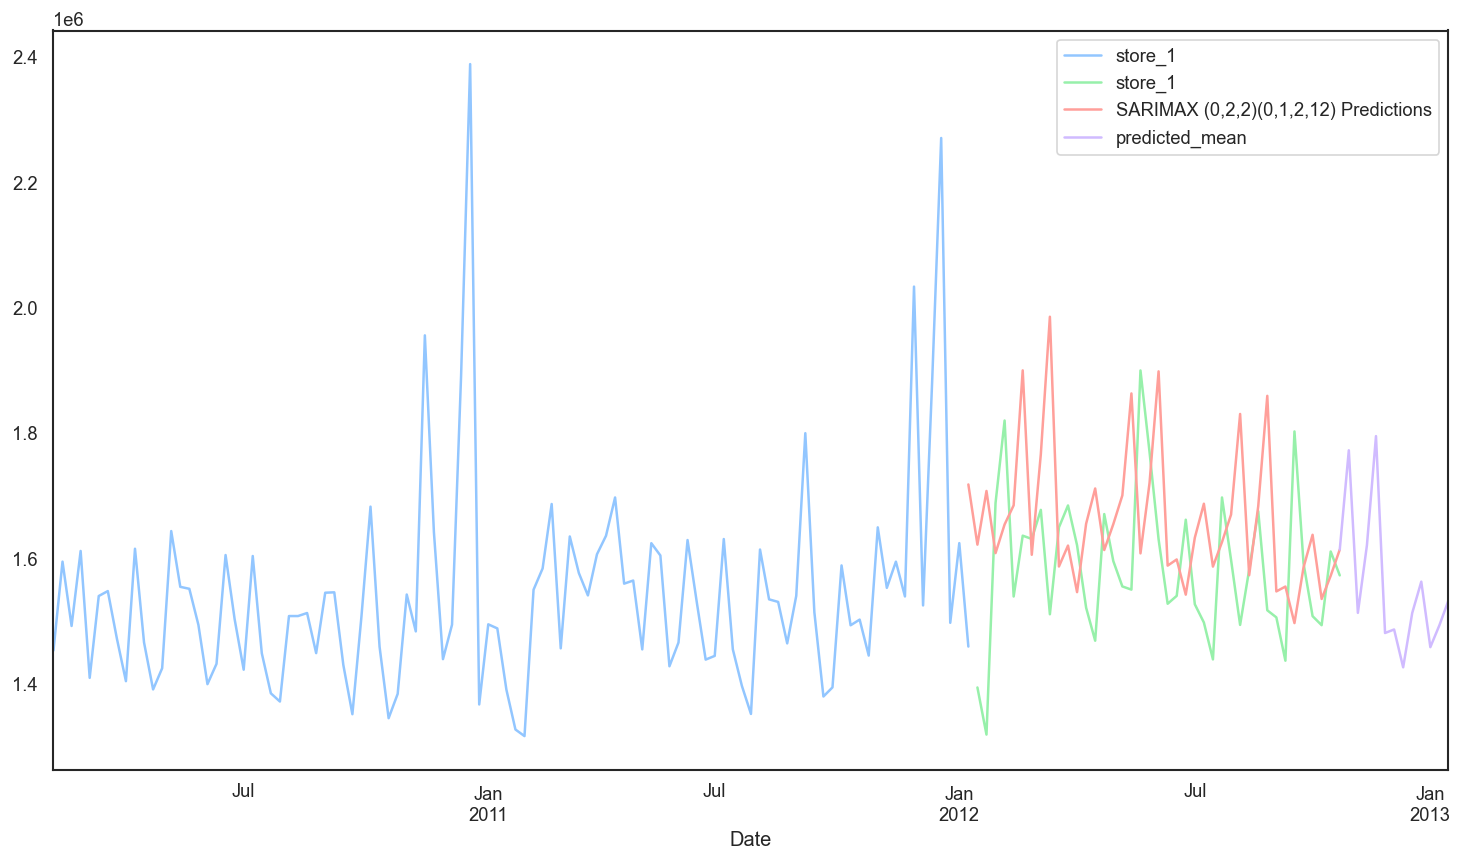

In [315]:
ts_train['store_1'].plot(figsize=(15,8), legend=True)
ts_test['store_1'].plot(legend=True)
forecast_test.plot(legend=True)
forecast_future.plot(legend=True)

# Conclusions

1.Sales during Holidays:

- We found that sales during holiday weeks are much higher compared to regular weeks. On average, sales double during holiday periods.

2.Seasonal Patterns:

There's a noticeable seasonal pattern in the sales data. This means that sales follow a certain trend that repeats over specific periods, likely corresponding to seasons or other time-based factors.

3.Store Performance Variation:

-The sales performance varies significantly among different stores. The top-performing stores have sales up to 500% higher than the lowest-performing ones.

4.Best Model - XGBoost Regressor:

-For predicting future sales, we found that the XGBoost Regressor model works best. This model achieved a Root Mean Squared Error (RMSE) of 1.13e+04, which means its predictions are close to the actual values.

5.RMSE and Model Accuracy:

-The RMSE of 1.13e+04 is a measure of how well the model predicts sales. In this case, it's 99% close to the median sale of the data, indicating a good estimate.
Implications for Businesses:

These findings are crucial for businesses. Understanding sales patterns during holidays helps in planning inventory, staffing, and marketing efforts effectively. Using a reliable model for sales forecasting allows businesses to make informed decisions and optimize their resources.
Hyperparameter Tuning:

Hyperparameter tuning involves adjusting the settings of a model to enhance its performance on a specific dataset. By carefully tweaking these parameters, we aim to improve the accuracy and effectiveness of the XGBoost Regressor model. This iterative process helps in finding the best possible configuration for the model.
In summary, these insights provide actionable information for businesses, and the XGBoost Regressor model, with optimized hyperparameters, is a powerful tool for accurate sales predictions.

# Saving the STAT.SARIMAX model

In [316]:
# Save the model using pickle

filename = 'SARIMAX_Stat_model.pkl'
results.save(filename)